# Curso Data Science: Proyecto Final
### NBA Proyect

### Integrantes:

##### Sebastian Kuperman
##### Rodrigo Exposito
##### Romina Lorente
##### Horacio Torregrosa

### Institución: Coder House

### Fecha de presentación:

# Tabla de Contenidos

##### Vamos a dividir el análisis en los siguientes apartados:

- Comprender el problema
- Análisis exploratorio y limpieza de datos (EDA)
- Análisis Univariado
- Análisis Bivariado
- Análisis Multivariado
- Aplicación de modelos de ML con técnicas de Balanced Methods, Cross Validation e Hyperparameter Tuning .
- Conclusiones

# Descripción del caso de negocio

Somos una agencia de basketball dedicada al servicio de asesoramiento profesional a clubes profesionales y basketbolistas. Nos especializamos en representación, negociación de contratos deportivos (jugadores & técnicos), marketing deportivo, management y marketing deportivo. Desarrollamos carreras y exportamos talento alrededor del mundo. 

Vinculamos jugadores con clubes de distintos clubes del mundo de acuerdo a su perfil. Ayudamos en el desarrollo y búsqueda de las mejores oportunidades para la carrera del jugador, como en la identificación de nuevas oportunidades previo a la expiración de su contrato.

Poseemos un conocimiento profundo del mercado basketbolístico que nos permite brindar un servicio dedicado exclusivamente al pleno desarrollo de la actividad deportiva de jugador. Nuestro objetivo es formar y fortalecer una relación de confianza con nuestros basketbolístas y maximizar sus transferencias y beneficios economicos.

# El problema

Para entender realmente el conjunto de datos, vamos a estudiar el significado y la relevancia de cada variable con respecto al problema. Nuestro objetivo es predecir qué jugadores serán **titulares o suplentes** y describir sus características a través de modelos de machine learning. Para ello, analizaremos las cualidades de los jugadores que participaron de la temporada **2020-2021** de la NBA.

Para ello, nos concentraremos en preguntarnos sobre:

- Qué variables consideraremos relevantes para nuestro estudio.
- Cuáles son las transformaciones que consideraremos necesarias realizar para obtener nuestro dataset definitivo.
- La relevancia de las distintas variables al momento de predecir o agrupar a los jugadores titulares/suplentes.
- Qué consejos o recomendaciones podríamos compartir con nuestros clientes al momento de considerar la relevancia deportiva de un jugador o club en función de sus características.

**Fuente**: https://www.kaggle.com/wyattowalsh/basketball

# 1. Proceso de análisis exploratorio de datos (EDA):

In [2]:
# Importamos las librerías básicas:

import pandas as pd
import matplotlib.pyplot as plt
from math import pi
import seaborn as sns
import numpy as np
import scipy
import sqlite3 as sql
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import KBinsDiscretizer
from  sklearn.cluster  import KMeans 
from sklearn import linear_model
from sklearn.metrics import r2_score 
from scipy import stats
from matplotlib.patches import Polygon
import pingouin as pg
import warnings
warnings.filterwarnings('ignore') # Para evitar los avisos molestos.
%matplotlib inline

In [3]:
### Creamos la conexión a la base de datos basketball.sqlite

con = sql.connect('E:/Desktop/Coder House/Data Science/Proyecto Final/basketball.sqlite')

# Con la conexión, creamos un objeto cursor
cur = con.cursor()               

# con.close() cerrar la conexión cuando no se use más la base de datos.

# Llamamos a la tabla Player_Salary

In [4]:
# Asignamos los datos de la tabla player_salary a un dataframe:

player_salary = pd.read_sql('SELECT * FROM Player_Salary', con)

In [5]:
# Muestreo de datos
player_salary.sample(5) 

,slugSeason,nameTeam,namePlayer,statusPlayer,isFinalSeason,isWaived,isOnRoster,isNonGuaranteed,isTeamOption,isPlayerOption,typeContractDetail,value
590,2020-21,Los Angeles Lakers,Quinn Cook,W,0,0,0,0,0,0,Not With Team,1000000.0
553,2020-21,Los Angeles Clippers,Terance Mann,current roster,0,0,1,0,0,0,Guaranteed,1517981.0
1086,2024-25,Sacramento Kings,De'Aaron Fox,current roster,1,0,1,0,0,0,Guaranteed,34848340.0
495,2021-22,Indiana Pacers,Goga Bitadze,current roster,0,0,1,0,0,0,Guaranteed,3098400.0
612,2020-21,Memphis Grizzlies,Dion Waiters,W,0,0,0,0,0,0,Not With Team,12650000.0


In [6]:
# Cantidad de filas y columnnas.

player_salary.shape

(1292, 12)

In [7]:
# Vemos cuáles son las columnas del df player_salary

player_salary.columns

Index(['slugSeason', 'nameTeam', 'namePlayer', 'statusPlayer', 'isFinalSeason',
       'isWaived', 'isOnRoster', 'isNonGuaranteed', 'isTeamOption',
       'isPlayerOption', 'typeContractDetail', 'value'],
      dtype='object')

In [8]:
# Info de datos de la tabla.

player_salary.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1292 entries, 0 to 1291
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   slugSeason          1292 non-null   object 
 1   nameTeam            1292 non-null   object 
 2   namePlayer          1292 non-null   object 
 3   statusPlayer        1292 non-null   object 
 4   isFinalSeason       1292 non-null   int64  
 5   isWaived            1292 non-null   int64  
 6   isOnRoster          1292 non-null   int64  
 7   isNonGuaranteed     1292 non-null   int64  
 8   isTeamOption        1292 non-null   int64  
 9   isPlayerOption      1292 non-null   int64  
 10  typeContractDetail  1292 non-null   object 
 11  value               1292 non-null   float64
dtypes: float64(1), int64(6), object(5)
memory usage: 121.2+ KB


In [9]:
player_salary.describe()

,isFinalSeason,isWaived,isOnRoster,isNonGuaranteed,isTeamOption,isPlayerOption,value
count,1292.000000,1292.0,1292.000000,1292.000000,1292.000000,1292.000000,1.292000e+03
mean,0.349845,0.0,0.909443,0.058824,0.093653,0.029412,9.762008e+06
std,0.477106,0.0,0.287090,0.235385,0.291459,0.169023,1.101132e+07
min,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,2.500000e+04
25%,0.000000,0.0,1.000000,0.000000,0.000000,0.000000,1.985463e+06
50%,0.000000,0.0,1.000000,0.000000,0.000000,0.000000,5.266713e+06
75%,1.000000,0.0,1.000000,0.000000,0.000000,0.000000,1.298160e+07
max,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,4.878768e+07


# Llamamos a la tabla Player_attributes

In [10]:
# Procederemos a llamar a la tabla "player_attributes y asignamos los datos de la tabla a un dataframe:

player_attributes = pd.read_sql('SELECT * FROM Player_Attributes', con)

In [11]:
player_attributes

,ID,FIRST_NAME,LAST_NAME,DISPLAY_FIRST_LAST,DISPLAY_LAST_COMMA_FIRST,DISPLAY_FI_LAST,PLAYER_SLUG,BIRTHDATE,SCHOOL,COUNTRY,...,NBA_FLAG,GAMES_PLAYED_FLAG,DRAFT_YEAR,DRAFT_ROUND,DRAFT_NUMBER,PTS,AST,REB,ALL_STAR_APPEARANCES,PIE
0,76001,Alaa,Abdelnaby,Alaa Abdelnaby,"Abdelnaby, Alaa",A. Abdelnaby,alaa-abdelnaby,1968-06-24T00:00:00,Duke,USA,...,Y,Y,1990,1,25,5.7,0.3,3.3,0.0,NaN
1,76002,Zaid,Abdul-Aziz,Zaid Abdul-Aziz,"Abdul-Aziz, Zaid",Z. Abdul-Aziz,zaid-abdul-aziz,1946-04-07T00:00:00,Iowa State,USA,...,Y,Y,1968,1,5,9.0,1.2,8.0,0.0,NaN
2,76003,Kareem,Abdul-Jabbar,Kareem Abdul-Jabbar,"Abdul-Jabbar, Kareem",K. Abdul-Jabbar,kareem-abdul-jabbar,1947-04-16T00:00:00,UCLA,USA,...,Y,Y,1969,1,1,24.6,3.6,11.2,18.0,NaN
3,51,Mahmoud,Abdul-Rauf,Mahmoud Abdul-Rauf,"Abdul-Rauf, Mahmoud",M. Abdul-Rauf,mahmoud-abdul-rauf,1969-03-09T00:00:00,Louisiana State,USA,...,Y,Y,1990,1,3,14.6,3.5,1.9,0.0,NaN
4,1505,Tariq,Abdul-Wahad,Tariq Abdul-Wahad,"Abdul-Wahad, Tariq",T. Abdul-Wahad,tariq-abdul-wahad,1974-11-03T00:00:00,San Jose State,France,...,Y,Y,1997,1,11,7.8,1.1,3.3,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4495,1627790,Ante,Zizic,Ante Zizic,"Zizic, Ante",A. Zizic,ante-zizic,1997-01-04T00:00:00,,Croatia,...,Y,Y,2016,1,23,6.0,0.6,3.9,0.0,NaN
4496,78647,Jim,Zoet,Jim Zoet,"Zoet, Jim",J. Zoet,jim-zoet,1953-12-30T00:00:00,Kent State,USA,...,Y,Y,Undrafted,Undrafted,Undrafted,0.3,0.1,1.1,0.0,NaN
4497,78648,Bill,Zopf,Bill Zopf,"Zopf, Bill",B. Zopf,bill-zopf,1948-06-07T00:00:00,Duquesne,USA,...,Y,Y,1970,2,33,2.2,1.4,0.9,0.0,NaN
4498,1627826,Ivica,Zubac,Ivica Zubac,"Zubac, Ivica",I. Zubac,ivica-zubac,1997-03-18T00:00:00,Mega Basket,Croatia,...,Y,Y,2016,2,32,8.5,1.1,7.0,NaN,0.126


In [12]:
# Cantidad de filas y columnnas.

player_attributes.shape

(4500, 37)

In [13]:
# Vemos cuáles son las columnas del df player_attributes

player_attributes.columns

Index(['ID', 'FIRST_NAME', 'LAST_NAME', 'DISPLAY_FIRST_LAST',
       'DISPLAY_LAST_COMMA_FIRST', 'DISPLAY_FI_LAST', 'PLAYER_SLUG',
       'BIRTHDATE', 'SCHOOL', 'COUNTRY', 'LAST_AFFILIATION', 'HEIGHT',
       'WEIGHT', 'SEASON_EXP', 'JERSEY', 'POSITION', 'ROSTERSTATUS',
       'GAMES_PLAYED_CURRENT_SEASON_FLAG', 'TEAM_ID', 'TEAM_NAME',
       'TEAM_ABBREVIATION', 'TEAM_CODE', 'TEAM_CITY', 'PLAYERCODE',
       'FROM_YEAR', 'TO_YEAR', 'DLEAGUE_FLAG', 'NBA_FLAG', 'GAMES_PLAYED_FLAG',
       'DRAFT_YEAR', 'DRAFT_ROUND', 'DRAFT_NUMBER', 'PTS', 'AST', 'REB',
       'ALL_STAR_APPEARANCES', 'PIE'],
      dtype='object')

In [14]:
# Info de datos de la tabla.

player_attributes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4500 entries, 0 to 4499
Data columns (total 37 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   ID                                4500 non-null   object 
 1   FIRST_NAME                        4500 non-null   object 
 2   LAST_NAME                         4500 non-null   object 
 3   DISPLAY_FIRST_LAST                4500 non-null   object 
 4   DISPLAY_LAST_COMMA_FIRST          4500 non-null   object 
 5   DISPLAY_FI_LAST                   4500 non-null   object 
 6   PLAYER_SLUG                       4500 non-null   object 
 7   BIRTHDATE                         4500 non-null   object 
 8   SCHOOL                            4497 non-null   object 
 9   COUNTRY                           4500 non-null   object 
 10  LAST_AFFILIATION                  4500 non-null   object 
 11  HEIGHT                            4403 non-null   float64
 12  WEIGHT

In [15]:
player_attributes.describe()

,HEIGHT,WEIGHT,SEASON_EXP,PTS,AST,REB,ALL_STAR_APPEARANCES,PIE
count,4403.000000,4399.000000,4500.000000,4485.000000,4485.000000,4193.000000,4056.000000,429.000000
mean,78.070634,211.146852,4.295556,6.357101,1.436299,2.981588,0.343195,0.084002
std,3.638698,27.075019,4.492292,4.925010,1.409078,2.288022,1.474006,0.088903
min,65.000000,133.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.500000
25%,75.000000,190.000000,1.000000,2.800000,0.500000,1.400000,0.000000,0.067000
50%,78.000000,210.000000,3.000000,5.100000,1.000000,2.400000,0.000000,0.089000
75%,81.000000,230.000000,7.000000,8.600000,1.900000,4.000000,0.000000,0.112000
max,91.000000,360.000000,22.000000,31.800000,11.200000,22.900000,18.000000,0.211000


 # Discretizaciones, limpieza y merge de tablas player_salary y player_attributes

### Transformaciones en la tabla player_salary

In [16]:
# Convertimos los valores de la variable value en números enteros.

player_salary['value'] = np.int64(player_salary['value'])
player_salary['value'].head(10)

0    18000000
1    18000000
2    18000000
3    18000000
4     1701593
5     2126991
6     1517981
7     1782621
8     2228276
9     4458000
Name: value, dtype: int64

In [17]:
# Resumen de estadística descriptiva:

player_salary['value'].describe()

count    1.292000e+03
mean     9.762008e+06
std      1.101132e+07
min      2.500000e+04
25%      1.985463e+06
50%      5.266713e+06
75%      1.298160e+07
max      4.878768e+07
Name: value, dtype: float64

In [18]:
player_salary['value'].min()


25000

In [19]:
player_salary['value'].max()

48787676

In [20]:
# KBinsDiscretizer nos permite discretizar de forma automática una variable en un número de intervalos predefinidos por nosotros 
# y en función de la estrategia indicada.
# Por lo tanto, procederemos a discretizar el campo "value" en 5 intervalos siguiendo la estrategia kmeans. Podemos observar cómo los valores 
# de la columna "value" ahora son valores discretos entre 0 y 4 (5 bines o intervalos diferentes). 
# strategy= kmeans nos permite agrupar los datos de cada intervalo según su centroide más cercano.


value_dis = KBinsDiscretizer(n_bins=5, encode='ordinal',
                           strategy = "kmeans").fit_transform(player_salary[['value']])

In [21]:
# Notamos también que no devuelve un dataframe, sino un array NumPy, por lo que el nombre de la columna lo perdemos. 
# Por tal motivo, convertiremos el array en un dataframe de Pandas para incorporarlo a nuestro data frame.
value_dis

array([[2.],
       [2.],
       [2.],
       ...,
       [4.],
       [1.],
       [1.]])

In [22]:
# Vemos el tipo de datos que contiene la nueva variable
value_dis.dtype

dtype('float64')

In [23]:
# Confirmamos que el tipo de estructura de la nueva variable es un array
type(value_dis)

numpy.ndarray

In [24]:
# Convertimos la estructura de la nueva variable en un dataframe y lo incorporamos a nuestro df player_salary

value_dis = pd.DataFrame(value_dis)
player_salary['value_dis'] = value_dis
player_salary['value_dis'] = np.int64(player_salary['value_dis'])

In [25]:
player_salary

,slugSeason,nameTeam,namePlayer,statusPlayer,isFinalSeason,isWaived,isOnRoster,isNonGuaranteed,isTeamOption,isPlayerOption,typeContractDetail,value,value_dis
0,2020-21,Atlanta Hawks,Bogdan Bogdanovic,current roster,0,0,1,0,0,0,Guaranteed,18000000,2
1,2021-22,Atlanta Hawks,Bogdan Bogdanovic,current roster,0,0,1,0,0,0,Guaranteed,18000000,2
2,2022-23,Atlanta Hawks,Bogdan Bogdanovic,current roster,0,0,1,0,0,0,Guaranteed,18000000,2
3,2023-24,Atlanta Hawks,Bogdan Bogdanovic,current roster,1,0,1,0,0,1,Player Option,18000000,2
4,2020-21,Atlanta Hawks,Brandon Goodwin,current roster,0,0,1,0,0,0,Guaranteed,1701593,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1287,2020-21,Washington Wizards,Russell Westbrook,current roster,0,0,1,0,0,0,Guaranteed,41358814,4
1288,2021-22,Washington Wizards,Russell Westbrook,current roster,0,0,1,0,0,0,Guaranteed,44211146,4
1289,2022-23,Washington Wizards,Russell Westbrook,current roster,1,0,1,0,0,1,Player Option,47063478,4
1290,2020-21,Washington Wizards,Thomas Bryant,current roster,0,0,1,0,0,0,Guaranteed,8333333,1


In [26]:
# Describimos la variable "values_dis"
player_salary['value_dis'].describe()

count    1292.000000
mean        0.897833
std         1.149045
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         4.000000
Name: value_dis, dtype: float64

In [27]:
# Filtramos el daframe para quedarnos con los registros que indican temporada regular 2020/2021. Esto es debido a que las 
# estadisticas de cada jugador están asignadas a la temporada 2020 y 2021.

slugSeason_20_21 = player_salary['slugSeason'] == "2020-21"
player_salary= player_salary[slugSeason_20_21]
player_salary


,slugSeason,nameTeam,namePlayer,statusPlayer,isFinalSeason,isWaived,isOnRoster,isNonGuaranteed,isTeamOption,isPlayerOption,typeContractDetail,value,value_dis
0,2020-21,Atlanta Hawks,Bogdan Bogdanovic,current roster,0,0,1,0,0,0,Guaranteed,18000000,2
4,2020-21,Atlanta Hawks,Brandon Goodwin,current roster,0,0,1,0,0,0,Guaranteed,1701593,0
6,2020-21,Atlanta Hawks,Bruno Fernando,current roster,0,0,1,0,0,0,Guaranteed,1517981,0
9,2020-21,Atlanta Hawks,Cam Reddish,current roster,0,0,1,0,0,0,Guaranteed,4458000,0
13,2020-21,Atlanta Hawks,Clint Capela,current roster,0,0,1,0,0,0,Guaranteed,16000000,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1281,2020-21,Washington Wizards,Raul Neto,current roster,1,0,1,0,0,0,Guaranteed,1620564,0
1282,2020-21,Washington Wizards,Robin Lopez,current roster,1,0,1,0,0,0,Guaranteed,7300000,1
1283,2020-21,Washington Wizards,Rui Hachimura,current roster,0,0,1,0,0,0,Guaranteed,4692840,0
1287,2020-21,Washington Wizards,Russell Westbrook,current roster,0,0,1,0,0,0,Guaranteed,41358814,4


### Merge entre tablas player_salary y player_attributes

In [28]:
# Contabilizamos cuántos registros comunes existen entre el df player_salary y el df player_attributes en función de los campos
# "namePlayer" y "DISPLAY_FIRST_LAST". 

len(set(player_salary["namePlayer"]).intersection(set(player_attributes["DISPLAY_FIRST_LAST"])))

401

In [29]:
# Hacemos un merge entre las dos tablas para construir el DF final a partir de los nombres coincidentes de los jugadores. 

df_final = pd.merge(left=player_salary,right=player_attributes, left_on='namePlayer', right_on='DISPLAY_FIRST_LAST')
df_final

,slugSeason,nameTeam,namePlayer,statusPlayer,isFinalSeason,isWaived,isOnRoster,isNonGuaranteed,isTeamOption,isPlayerOption,...,NBA_FLAG,GAMES_PLAYED_FLAG,DRAFT_YEAR,DRAFT_ROUND,DRAFT_NUMBER,PTS,AST,REB,ALL_STAR_APPEARANCES,PIE
0,2020-21,Atlanta Hawks,Bogdan Bogdanovic,current roster,0,0,1,0,0,0,...,Y,Y,2014,1,27,9.6,2.3,3.3,NaN,0.080
1,2020-21,Atlanta Hawks,Brandon Goodwin,current roster,0,0,1,0,0,0,...,Y,Y,Undrafted,Undrafted,Undrafted,3.9,1.6,1.0,NaN,0.062
2,2020-21,Atlanta Hawks,Bruno Fernando,current roster,0,0,1,0,0,0,...,Y,Y,2019,2,34,1.5,0.4,3.0,NaN,0.073
3,2020-21,Atlanta Hawks,Cam Reddish,current roster,0,0,1,0,0,0,...,Y,Y,2019,1,10,11.2,1.3,4.0,NaN,0.053
4,2020-21,Atlanta Hawks,Clint Capela,current roster,0,0,1,0,0,0,...,Y,Y,2014,1,25,14.3,0.9,14.2,NaN,0.161
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,2020-21,Washington Wizards,Raul Neto,current roster,1,0,1,0,0,0,...,Y,Y,2013,2,47,7.7,2.2,2.2,NaN,0.081
414,2020-21,Washington Wizards,Robin Lopez,current roster,1,0,1,0,0,0,...,Y,Y,2008,1,15,8.2,0.9,4.1,NaN,0.084
415,2020-21,Washington Wizards,Rui Hachimura,current roster,0,0,1,0,0,0,...,Y,Y,2019,1,9,13.4,1.5,5.8,NaN,0.085
416,2020-21,Washington Wizards,Russell Westbrook,current roster,0,0,1,0,0,0,...,Y,Y,2008,1,4,21.7,10.3,9.5,NaN,0.146


In [30]:
# Visualizamos todas las columnas del dataframe final
pd.options.display.max_columns=0
df_final

,slugSeason,nameTeam,namePlayer,statusPlayer,isFinalSeason,isWaived,isOnRoster,isNonGuaranteed,isTeamOption,isPlayerOption,typeContractDetail,value,value_dis,ID,FIRST_NAME,LAST_NAME,DISPLAY_FIRST_LAST,DISPLAY_LAST_COMMA_FIRST,DISPLAY_FI_LAST,PLAYER_SLUG,BIRTHDATE,SCHOOL,COUNTRY,LAST_AFFILIATION,HEIGHT,WEIGHT,SEASON_EXP,JERSEY,POSITION,ROSTERSTATUS,GAMES_PLAYED_CURRENT_SEASON_FLAG,TEAM_ID,TEAM_NAME,TEAM_ABBREVIATION,TEAM_CODE,TEAM_CITY,PLAYERCODE,FROM_YEAR,TO_YEAR,DLEAGUE_FLAG,NBA_FLAG,GAMES_PLAYED_FLAG,DRAFT_YEAR,DRAFT_ROUND,DRAFT_NUMBER,PTS,AST,REB,ALL_STAR_APPEARANCES,PIE
0,2020-21,Atlanta Hawks,Bogdan Bogdanovic,current roster,0,0,1,0,0,0,Guaranteed,18000000,2,203992,Bogdan,Bogdanovic,Bogdan Bogdanovic,"Bogdanovic, Bogdan",B. Bogdanovic,bogdan-bogdanovic,1992-08-18T00:00:00,Fenerbahce,Serbia,Fenerbahce/Serbia,78.0,220.0,3,13,Guard,Active,Y,1610612737,Hawks,ATL,hawks,Atlanta,bogdan_bogdanovic,2017,2020,N,Y,Y,2014,1,27,9.6,2.3,3.3,NaN,0.080
1,2020-21,Atlanta Hawks,Brandon Goodwin,current roster,0,0,1,0,0,0,Guaranteed,1701593,0,1629164,Brandon,Goodwin,Brandon Goodwin,"Goodwin, Brandon",B. Goodwin,brandon-goodwin,1995-10-02T00:00:00,Florida Gulf Coast,USA,Florida Gulf Coast/USA,72.0,180.0,2,0,Guard,Active,Y,1610612737,Hawks,ATL,hawks,Atlanta,brandon_goodwin,2018,2020,Y,Y,Y,Undrafted,Undrafted,Undrafted,3.9,1.6,1.0,NaN,0.062
2,2020-21,Atlanta Hawks,Bruno Fernando,current roster,0,0,1,0,0,0,Guaranteed,1517981,0,1628981,Bruno,Fernando,Bruno Fernando,"Fernando, Bruno",B. Fernando,bruno-fernando,1998-08-15T00:00:00,Maryland,Angola,Maryland/Angola,81.0,240.0,1,24,Forward-Center,Active,Y,1610612737,Hawks,ATL,hawks,Atlanta,bruno_fernando,2019,2020,Y,Y,Y,2019,2,34,1.5,0.4,3.0,NaN,0.073
3,2020-21,Atlanta Hawks,Cam Reddish,current roster,0,0,1,0,0,0,Guaranteed,4458000,0,1629629,Cam,Reddish,Cam Reddish,"Reddish, Cam",C. Reddish,cam-reddish,1999-09-01T00:00:00,Duke,USA,Duke/USA,80.0,218.0,1,22,Forward-Guard,Active,Y,1610612737,Hawks,ATL,hawks,Atlanta,cameron_reddish,2019,2020,N,Y,Y,2019,1,10,11.2,1.3,4.0,NaN,0.053
4,2020-21,Atlanta Hawks,Clint Capela,current roster,0,0,1,0,0,0,Guaranteed,16000000,2,203991,Clint,Capela,Clint Capela,"Capela, Clint",C. Capela,clint-capela,1994-05-18T00:00:00,Elan Chalon,Switzerland,Elan Chalon/Switzerland,82.0,240.0,6,15,Center,Active,Y,1610612737,Hawks,ATL,hawks,Atlanta,clint_capela,2014,2020,Y,Y,Y,2014,1,25,14.3,0.9,14.2,NaN,0.161
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,2020-21,Washington Wizards,Raul Neto,current roster,1,0,1,0,0,0,Guaranteed,1620564,0,203526,Raul,Neto,Raul Neto,"Neto, Raul",R. Neto,raul-neto,1992-05-19T00:00:00,Murcia,Brazil,Murcia/Brazil,73.0,180.0,5,19,Guard,Active,Y,1610612764,Wizards,WAS,wizards,Washington,raul_neto,2015,2020,Y,Y,Y,2013,2,47,7.7,2.2,2.2,NaN,0.081
414,2020-21,Washington Wizards,Robin Lopez,current roster,1,0,1,0,0,0,Guaranteed,7300000,1,201577,Robin,Lopez,Robin Lopez,"Lopez, Robin",R. Lopez,robin-lopez,1988-04-01T00:00:00,Stanford,USA,Stanford/USA,84.0,281.0,12,15,Center,Active,Y,1610612764,Wizards,WAS,wizards,Washington,robin_lopez,2008,2020,N,Y,Y,2008,1,15,8.2,0.9,4.1,NaN,0.084
415,2020-21,Washington Wizards,Rui Hachimura,current roster,0,0,1,0,0,0,Guaranteed,4692840,0,1629060,Rui,Hachimura,Rui Hachimura,"Hachimura, Rui",R. Hachimura,rui-hachimura,1998-02-08T00:00:00,Gonzaga,Japan,Gonzaga/Japan,80.0,230.0,1,8,Forward,Active,Y,1610612764,Wizards,WAS,wizards,Washington,rui_hachimura,2019,2020,N,Y,Y,2019,1,9,13.4,1.5,5.8,NaN,0.085
416,2020-21,Washington Wizards,Russell Westbrook,current roster,0,0,1,0,0,0,Guaranteed,41358814,4,201566,Russell,Westbrook,Russell Westbrook,"Westbrook, Russell",R. Westbrook,russell-westbrook,1988-11-12T00:00:00,UCLA,USA,UCLA/USA,75.0,200.0,12,4,Guard,Active,Y,1610612764,Wizards,WAS,wizards,Washington,russell_westbrook,2008,2020,N,Y,Y,2008,1,4,21.7,10.3,9.5,NaN,0.146


In [31]:
# Eliminamos las columnas del df final que consideramos innecesarias (podríamos conservar el ID del jugador para hacer más uniones con otras
# tablas si lo consideramos necesario. Igualmente las columnas que dejé en mayúscula nos sirven para joinear con otras tablas)

df_final.drop(['slugSeason','statusPlayer','isFinalSeason','isWaived', 'isNonGuaranteed','isTeamOption','isPlayerOption','FIRST_NAME','LAST_NAME','DISPLAY_FIRST_LAST','DISPLAY_LAST_COMMA_FIRST','DISPLAY_FI_LAST','PLAYER_SLUG','BIRTHDATE','LAST_AFFILIATION','GAMES_PLAYED_CURRENT_SEASON_FLAG','FROM_YEAR','TO_YEAR','DLEAGUE_FLAG','NBA_FLAG','GAMES_PLAYED_FLAG','DRAFT_NUMBER','PIE','TEAM_ID','TEAM_ABBREVIATION','TEAM_CODE','PLAYERCODE','TEAM_NAME', 'TEAM_CITY','ALL_STAR_APPEARANCES','ROSTERSTATUS'], axis=1,inplace=True)
df_final


,nameTeam,namePlayer,isOnRoster,typeContractDetail,value,value_dis,ID,SCHOOL,COUNTRY,HEIGHT,WEIGHT,SEASON_EXP,JERSEY,POSITION,DRAFT_YEAR,DRAFT_ROUND,PTS,AST,REB
0,Atlanta Hawks,Bogdan Bogdanovic,1,Guaranteed,18000000,2,203992,Fenerbahce,Serbia,78.0,220.0,3,13,Guard,2014,1,9.6,2.3,3.3
1,Atlanta Hawks,Brandon Goodwin,1,Guaranteed,1701593,0,1629164,Florida Gulf Coast,USA,72.0,180.0,2,0,Guard,Undrafted,Undrafted,3.9,1.6,1.0
2,Atlanta Hawks,Bruno Fernando,1,Guaranteed,1517981,0,1628981,Maryland,Angola,81.0,240.0,1,24,Forward-Center,2019,2,1.5,0.4,3.0
3,Atlanta Hawks,Cam Reddish,1,Guaranteed,4458000,0,1629629,Duke,USA,80.0,218.0,1,22,Forward-Guard,2019,1,11.2,1.3,4.0
4,Atlanta Hawks,Clint Capela,1,Guaranteed,16000000,2,203991,Elan Chalon,Switzerland,82.0,240.0,6,15,Center,2014,1,14.3,0.9,14.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,Washington Wizards,Raul Neto,1,Guaranteed,1620564,0,203526,Murcia,Brazil,73.0,180.0,5,19,Guard,2013,2,7.7,2.2,2.2
414,Washington Wizards,Robin Lopez,1,Guaranteed,7300000,1,201577,Stanford,USA,84.0,281.0,12,15,Center,2008,1,8.2,0.9,4.1
415,Washington Wizards,Rui Hachimura,1,Guaranteed,4692840,0,1629060,Gonzaga,Japan,80.0,230.0,1,8,Forward,2019,1,13.4,1.5,5.8
416,Washington Wizards,Russell Westbrook,1,Guaranteed,41358814,4,201566,UCLA,USA,75.0,200.0,12,4,Guard,2008,1,21.7,10.3,9.5


### Transformaciones en la tabla final

In [32]:
# Vemos los nombres de las columnas para transformarlos
df_final.columns

Index(['nameTeam', 'namePlayer', 'isOnRoster', 'typeContractDetail', 'value',
       'value_dis', 'ID', 'SCHOOL', 'COUNTRY', 'HEIGHT', 'WEIGHT',
       'SEASON_EXP', 'JERSEY', 'POSITION', 'DRAFT_YEAR', 'DRAFT_ROUND', 'PTS',
       'AST', 'REB'],
      dtype='object')

In [33]:
# Transformamos los nombres de las columnas

df_final.columns= ['Nombre_equipo', 'Nombre_jugador', 'Titular','Detalle_contrato', 'Valor_jugador',
       'Valor_jugador_dis', 'ID', 'Universidad', 'País', 'Altura_pulgadas', 'Peso_libras',
       'Experiencia_temporadas', 'Número_camiseta', 'Posición','Año_draft', 'Ronda_draft', 'Puntos', 'Asistencias','Rebotes']
df_final


,Nombre_equipo,Nombre_jugador,Titular,Detalle_contrato,Valor_jugador,Valor_jugador_dis,ID,Universidad,País,Altura_pulgadas,Peso_libras,Experiencia_temporadas,Número_camiseta,Posición,Año_draft,Ronda_draft,Puntos,Asistencias,Rebotes
0,Atlanta Hawks,Bogdan Bogdanovic,1,Guaranteed,18000000,2,203992,Fenerbahce,Serbia,78.0,220.0,3,13,Guard,2014,1,9.6,2.3,3.3
1,Atlanta Hawks,Brandon Goodwin,1,Guaranteed,1701593,0,1629164,Florida Gulf Coast,USA,72.0,180.0,2,0,Guard,Undrafted,Undrafted,3.9,1.6,1.0
2,Atlanta Hawks,Bruno Fernando,1,Guaranteed,1517981,0,1628981,Maryland,Angola,81.0,240.0,1,24,Forward-Center,2019,2,1.5,0.4,3.0
3,Atlanta Hawks,Cam Reddish,1,Guaranteed,4458000,0,1629629,Duke,USA,80.0,218.0,1,22,Forward-Guard,2019,1,11.2,1.3,4.0
4,Atlanta Hawks,Clint Capela,1,Guaranteed,16000000,2,203991,Elan Chalon,Switzerland,82.0,240.0,6,15,Center,2014,1,14.3,0.9,14.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,Washington Wizards,Raul Neto,1,Guaranteed,1620564,0,203526,Murcia,Brazil,73.0,180.0,5,19,Guard,2013,2,7.7,2.2,2.2
414,Washington Wizards,Robin Lopez,1,Guaranteed,7300000,1,201577,Stanford,USA,84.0,281.0,12,15,Center,2008,1,8.2,0.9,4.1
415,Washington Wizards,Rui Hachimura,1,Guaranteed,4692840,0,1629060,Gonzaga,Japan,80.0,230.0,1,8,Forward,2019,1,13.4,1.5,5.8
416,Washington Wizards,Russell Westbrook,1,Guaranteed,41358814,4,201566,UCLA,USA,75.0,200.0,12,4,Guard,2008,1,21.7,10.3,9.5


In [34]:
# Convertimos la unidad de medida de la altura de los jugadores (pulgadas) en metros

altura_metros= df_final['Altura_pulgadas'].apply(lambda x : x /39.37)
df_final['Altura_pulgadas']= round(altura_metros,2)
df_final = df_final.rename(columns={'Altura_pulgadas': 'Altura_metros'})
df_final


,Nombre_equipo,Nombre_jugador,Titular,Detalle_contrato,Valor_jugador,Valor_jugador_dis,ID,Universidad,País,Altura_metros,Peso_libras,Experiencia_temporadas,Número_camiseta,Posición,Año_draft,Ronda_draft,Puntos,Asistencias,Rebotes
0,Atlanta Hawks,Bogdan Bogdanovic,1,Guaranteed,18000000,2,203992,Fenerbahce,Serbia,1.98,220.0,3,13,Guard,2014,1,9.6,2.3,3.3
1,Atlanta Hawks,Brandon Goodwin,1,Guaranteed,1701593,0,1629164,Florida Gulf Coast,USA,1.83,180.0,2,0,Guard,Undrafted,Undrafted,3.9,1.6,1.0
2,Atlanta Hawks,Bruno Fernando,1,Guaranteed,1517981,0,1628981,Maryland,Angola,2.06,240.0,1,24,Forward-Center,2019,2,1.5,0.4,3.0
3,Atlanta Hawks,Cam Reddish,1,Guaranteed,4458000,0,1629629,Duke,USA,2.03,218.0,1,22,Forward-Guard,2019,1,11.2,1.3,4.0
4,Atlanta Hawks,Clint Capela,1,Guaranteed,16000000,2,203991,Elan Chalon,Switzerland,2.08,240.0,6,15,Center,2014,1,14.3,0.9,14.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,Washington Wizards,Raul Neto,1,Guaranteed,1620564,0,203526,Murcia,Brazil,1.85,180.0,5,19,Guard,2013,2,7.7,2.2,2.2
414,Washington Wizards,Robin Lopez,1,Guaranteed,7300000,1,201577,Stanford,USA,2.13,281.0,12,15,Center,2008,1,8.2,0.9,4.1
415,Washington Wizards,Rui Hachimura,1,Guaranteed,4692840,0,1629060,Gonzaga,Japan,2.03,230.0,1,8,Forward,2019,1,13.4,1.5,5.8
416,Washington Wizards,Russell Westbrook,1,Guaranteed,41358814,4,201566,UCLA,USA,1.91,200.0,12,4,Guard,2008,1,21.7,10.3,9.5


In [35]:
# Vemos las categorías únicas de la variable "Posición". Vemos que hay categorías que refieren a una misma posición
# pero que están escritas de diferente manera.

np.unique(df_final['Posición'])

array(['Center', 'Center-Forward', 'Forward', 'Forward-Center',
       'Forward-Guard', 'Guard', 'Guard-Forward'], dtype=object)

In [36]:
# Transformamos los nombres de las categorías de la variable "Posición"

df_final.Posición = df_final.Posición.replace({"Center-Forward":"Small Forward", "Forward-Center":"Power Forward","Forward-Guard":"Shooting Guard","Guard-Forward":"Shooting Guard", "Guard":"Point Guard","Forward":"Power Forward"})
df_final

,Nombre_equipo,Nombre_jugador,Titular,Detalle_contrato,Valor_jugador,Valor_jugador_dis,ID,Universidad,País,Altura_metros,Peso_libras,Experiencia_temporadas,Número_camiseta,Posición,Año_draft,Ronda_draft,Puntos,Asistencias,Rebotes
0,Atlanta Hawks,Bogdan Bogdanovic,1,Guaranteed,18000000,2,203992,Fenerbahce,Serbia,1.98,220.0,3,13,Point Guard,2014,1,9.6,2.3,3.3
1,Atlanta Hawks,Brandon Goodwin,1,Guaranteed,1701593,0,1629164,Florida Gulf Coast,USA,1.83,180.0,2,0,Point Guard,Undrafted,Undrafted,3.9,1.6,1.0
2,Atlanta Hawks,Bruno Fernando,1,Guaranteed,1517981,0,1628981,Maryland,Angola,2.06,240.0,1,24,Power Forward,2019,2,1.5,0.4,3.0
3,Atlanta Hawks,Cam Reddish,1,Guaranteed,4458000,0,1629629,Duke,USA,2.03,218.0,1,22,Shooting Guard,2019,1,11.2,1.3,4.0
4,Atlanta Hawks,Clint Capela,1,Guaranteed,16000000,2,203991,Elan Chalon,Switzerland,2.08,240.0,6,15,Center,2014,1,14.3,0.9,14.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,Washington Wizards,Raul Neto,1,Guaranteed,1620564,0,203526,Murcia,Brazil,1.85,180.0,5,19,Point Guard,2013,2,7.7,2.2,2.2
414,Washington Wizards,Robin Lopez,1,Guaranteed,7300000,1,201577,Stanford,USA,2.13,281.0,12,15,Center,2008,1,8.2,0.9,4.1
415,Washington Wizards,Rui Hachimura,1,Guaranteed,4692840,0,1629060,Gonzaga,Japan,2.03,230.0,1,8,Power Forward,2019,1,13.4,1.5,5.8
416,Washington Wizards,Russell Westbrook,1,Guaranteed,41358814,4,201566,UCLA,USA,1.91,200.0,12,4,Point Guard,2008,1,21.7,10.3,9.5


In [37]:
# Convertimos la unidad de medida del peso de los jugadores (libas) en kg

peso_kg= df_final['Peso_libras'].apply(lambda x : x /2.205)
df_final['Peso_libras']= peso_kg
df_final = df_final.rename(columns={'Peso_libras': 'Peso_kg'})
df_final

,Nombre_equipo,Nombre_jugador,Titular,Detalle_contrato,Valor_jugador,Valor_jugador_dis,ID,Universidad,País,Altura_metros,Peso_kg,Experiencia_temporadas,Número_camiseta,Posición,Año_draft,Ronda_draft,Puntos,Asistencias,Rebotes
0,Atlanta Hawks,Bogdan Bogdanovic,1,Guaranteed,18000000,2,203992,Fenerbahce,Serbia,1.98,99.773243,3,13,Point Guard,2014,1,9.6,2.3,3.3
1,Atlanta Hawks,Brandon Goodwin,1,Guaranteed,1701593,0,1629164,Florida Gulf Coast,USA,1.83,81.632653,2,0,Point Guard,Undrafted,Undrafted,3.9,1.6,1.0
2,Atlanta Hawks,Bruno Fernando,1,Guaranteed,1517981,0,1628981,Maryland,Angola,2.06,108.843537,1,24,Power Forward,2019,2,1.5,0.4,3.0
3,Atlanta Hawks,Cam Reddish,1,Guaranteed,4458000,0,1629629,Duke,USA,2.03,98.866213,1,22,Shooting Guard,2019,1,11.2,1.3,4.0
4,Atlanta Hawks,Clint Capela,1,Guaranteed,16000000,2,203991,Elan Chalon,Switzerland,2.08,108.843537,6,15,Center,2014,1,14.3,0.9,14.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,Washington Wizards,Raul Neto,1,Guaranteed,1620564,0,203526,Murcia,Brazil,1.85,81.632653,5,19,Point Guard,2013,2,7.7,2.2,2.2
414,Washington Wizards,Robin Lopez,1,Guaranteed,7300000,1,201577,Stanford,USA,2.13,127.437642,12,15,Center,2008,1,8.2,0.9,4.1
415,Washington Wizards,Rui Hachimura,1,Guaranteed,4692840,0,1629060,Gonzaga,Japan,2.03,104.308390,1,8,Power Forward,2019,1,13.4,1.5,5.8
416,Washington Wizards,Russell Westbrook,1,Guaranteed,41358814,4,201566,UCLA,USA,1.91,90.702948,12,4,Point Guard,2008,1,21.7,10.3,9.5


In [38]:
# Vemos cuántas observaciones y campos tiene la tabla final
print(df_final.shape)

(418, 19)


In [39]:
#Vemos si tenemos missings
df_final.count()

Nombre_equipo             418
Nombre_jugador            418
Titular                   418
Detalle_contrato          418
Valor_jugador             418
Valor_jugador_dis         418
ID                        418
Universidad               418
País                      418
Altura_metros             418
Peso_kg                   418
Experiencia_temporadas    418
Número_camiseta           418
Posición                  418
Año_draft                 418
Ronda_draft               418
Puntos                    418
Asistencias               418
Rebotes                   418
dtype: int64

In [40]:
# Analizamos el tipo de dato de los distintos campos
df_final.dtypes

Nombre_equipo              object
Nombre_jugador             object
Titular                     int64
Detalle_contrato           object
Valor_jugador               int64
Valor_jugador_dis           int64
ID                         object
Universidad                object
País                       object
Altura_metros             float64
Peso_kg                   float64
Experiencia_temporadas      int64
Número_camiseta            object
Posición                   object
Año_draft                  object
Ronda_draft                object
Puntos                    float64
Asistencias               float64
Rebotes                   float64
dtype: object

# 2. Análisis univariado:

array([[<AxesSubplot:title={'center':'Titular'}>,
        <AxesSubplot:title={'center':'Valor_jugador'}>,
        <AxesSubplot:title={'center':'Valor_jugador_dis'}>],
       [<AxesSubplot:title={'center':'Altura_metros'}>,
        <AxesSubplot:title={'center':'Peso_kg'}>,
        <AxesSubplot:title={'center':'Experiencia_temporadas'}>],
       [<AxesSubplot:title={'center':'Puntos'}>,
        <AxesSubplot:title={'center':'Asistencias'}>,
        <AxesSubplot:title={'center':'Rebotes'}>]], dtype=object)

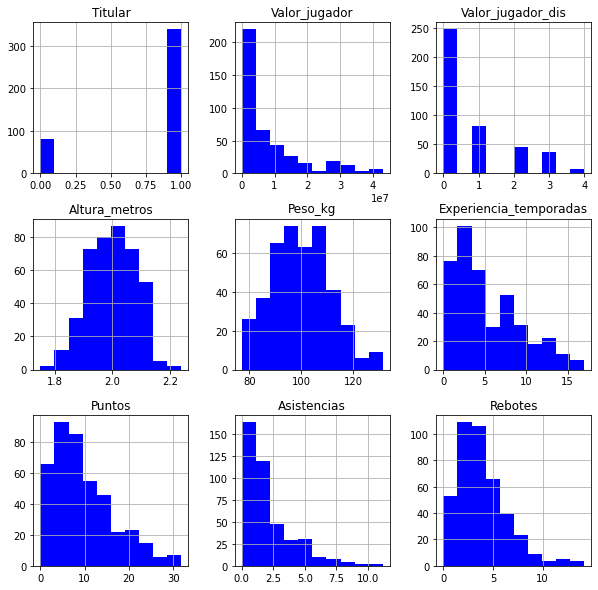

In [41]:
# Visualizamos las variables numéricas del df_final para ver sus frecuencias y distribuciones

df_final.hist(color='blue', figsize=(10,10))

<AxesSubplot:xlabel='Valor_jugador_dis', ylabel='Density'>

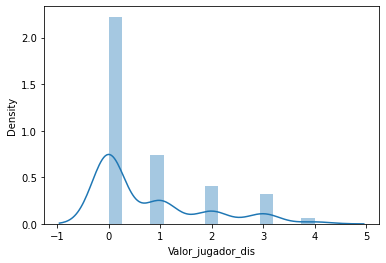

In [42]:
# Realizamos un histograma de la variable discretizada Valor_jugador_dis.
# A simple vista se pueden apreciar que la variable "Valor_jugador_dis" presenta:

# - Una distribución asimétrica positiva.
# - Una distribución sesgada hacia la derecha.

# A su vez, notamos que existe una mayoría de jugadores con un valor de mercado clasificado en 0. Mientras que los jugadores
# que más ganan (3 y 4) representan a la minoría.


sns.distplot(df_final['Valor_jugador_dis'])

<AxesSubplot:xlabel='Valor_jugador', ylabel='Density'>

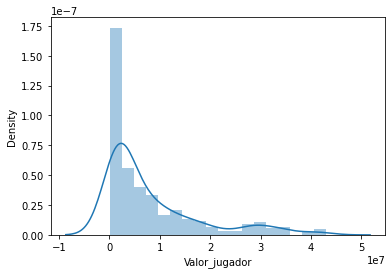

In [43]:
sns.distplot(df_final['Valor_jugador'])

In [44]:
# Para entender el gráfico anterior, veremos la cantidad de jugadores por categoría de valor de mercado obtenida gracias 
# al cluster. Entendemos que hay una mayoría de jugadores con categoría de valor de mercado 0. Estos son los jugadores con
# valores más bajos, mientras que los de categoría 4 son los jugadores con valor de mercado más alto.

df_final.value_counts(df_final['Valor_jugador_dis'])

Valor_jugador_dis
0    248
1     82
2     45
3     36
4      7
dtype: int64

<AxesSubplot:xlabel='Valor_jugador', ylabel='Density'>

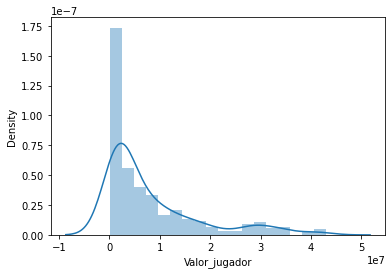

In [45]:
# Si realizamos el mismo gráfico aplicado a la distribución de los valores de mercado en la variable no discretizada
# "Valor_jugador", veremos la misma distribución debido a que existe una mayoría de jugadores de menor valor.

sns.distplot(df_final['Valor_jugador'])

In [46]:
# Asimetría y curtosis (asimetría y homogeneidad).
# Entendemos que la distribución del valor de mercado de los jugadores es sesgada hacia la derecha, debido a que existe valores
# de jugadores que son más altos que la media de la distribución (corriendo la cola de la distribución hacia la derecha por
# los valores menos típicos). Asimismo, la asimetría es positiva porque el valor de skewness es positivo (1.69).

# Respecto a la curtosis, tenemos una distribución mesocurtica debido a que tiene una curtosis menor a 3, teniendo
# una distribución más aplanada. Al tener una curtosis de 2,12 tiene menos apuntalamiento porque existe una distribución de
# valores que hace que no se concentren la mayoría de los casos alrededor de la media de la variable (la frecuencia relativa
# de los datos no se reparte tanto en un centro, debido a que en los extremos existen casos de algunos jugadores que tienen 
# un valor de mercado más alto).

print("Skewness: %f" % df_final['Valor_jugador'].skew())
print("Kurtosis: %f" % df_final['Valor_jugador'].kurt())

Skewness: 1.689640
Kurtosis: 2.116946


<AxesSubplot:xlabel='Valor_jugador_dis', ylabel='Density'>

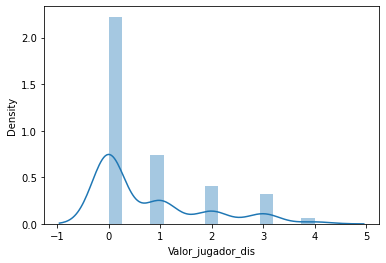

In [47]:
# Realizamos un histograma de la variable discretizada Valor_jugador_dis.
# A simple vista se pueden apreciar que la variable "Valor_jugador_dis" presenta:

# - Una distribución asimétrica positiva.
# - Una distribución sesgada hacia la derecha.

# A su vez, notamos que existe una mayoría de jugadores con un valor de mercado clasificado en 0. Mientras que los jugadores
# que más ganan (3 y 4) representan a la minoría.


sns.distplot(df_final['Valor_jugador_dis'])

<AxesSubplot:>

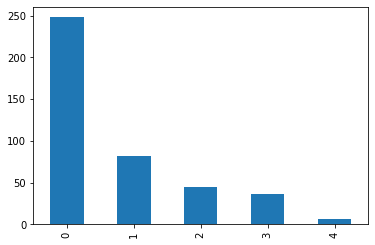

In [48]:
# Graficamos el cuadro de cantidad de jugadores por categoría de valor de mercado.

df_final['Valor_jugador_dis'].value_counts().plot.bar()


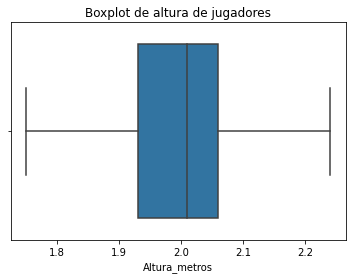

In [49]:
# Hacemos un boxplot de la altura de los jugadores. Podemos ver que el 50% de los jugadores mide 2 metros. Mientras que
# solo un 25% mide más de 2,10 metros

Valor= df_final['Altura_metros']
País= df_final['Nombre_equipo']
sns.boxplot(x=Valor).set_title('Boxplot de altura de jugadores')
plt.show()

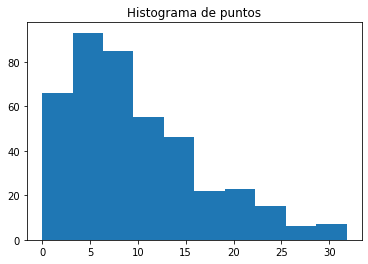

In [50]:
# Realizamos un histograma de los Puntos promedios convertidos en la temporada 2020-2021.
# Vemos que la mayoría de los jugadores del dataframe convirtió en promedio entre 5 y 15 puntos.

plt.hist(df_final['Puntos'],bins = 10) 
plt.title("Histograma de puntos");

# 3. Análisis Bivariado

Text(0.5, 0, 'Tipo de contrato')

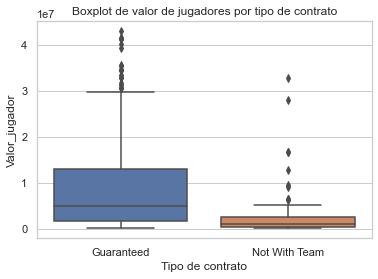

In [51]:
# Realizamos un boxplot comparado entre el valor de los jugadores en función de su tipo de contrato.
# Vemos que existen jugadores contratados que ganan mucho más que la mayoría de los jugadores concentrados entre el
# cuartil 1 y el cuartil 3. Estos outliers son los jugadores estrella de la nba que se encuentran contratados.
# Por otro lado, los jugadores no contratados ganan mucho menos, pero existen algunos casos aislados de jugadores con un
# valor de mercado equiparable al de los jugadores estrella que se encuentran contratados.

sns.set_theme(style="whitegrid")
ax = sns.boxplot(y=df_final.Valor_jugador, x=df_final.Detalle_contrato)
plt.title('Boxplot de valor de jugadores por tipo de contrato')
plt.xlabel('Tipo de contrato')

Text(0.5, 0, 'Posición')

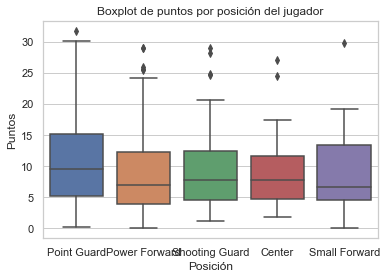

In [52]:
# Podemos ver que los point guard (bases o armadores) convirtieron en promedio mayores anotaciones que los center. 
# Asimismo point guard tiene la mediana más alta, concentrándo a la mitad de los jugadores en ese rol con un promedio de 
# entre casi 9 puntos y 15 puntos. Asimismo vemos que los small forward (aleros) tienen una distribución asimétrica de puntos.
# Esto lo veremos en el siguiente gráfico

sns.set_theme(style="whitegrid")
ax = sns.boxplot(y=df_final.Puntos, x=df_final.Posición)
plt.title('Boxplot de puntos por posición del jugador')
plt.xlabel('Posición')

In [53]:
# Calculamos cuáles son los 5 clubes que concentran la suma de los jugadores más caros del mercado.

Filtro_equipos_jugadores_caros=df_final.groupby(['Nombre_equipo']).agg({'Valor_jugador': 'sum'})
Equipos_jugadores_caros = Filtro_equipos_jugadores_caros.sort_values('Valor_jugador',ascending=False).reset_index()
Equipos_jugadores_caros.head(5)

,Nombre_equipo,Valor_jugador
0,Brooklyn Nets,162209216
1,Golden State Warriors,144127386
2,Philadelphia 76ers,140177547
3,Utah Jazz,133057267
4,Miami Heat,129297769


In [54]:
# Calculamos cuáles son los 5 países que concentran a los jugadores más caros del mercado.

Filtro_países_jugadores_caros=df_final.groupby(['País']).agg({'Valor_jugador': 'sum'})
Países_jugadores_caros = Filtro_países_jugadores_caros.sort_values('Valor_jugador',ascending=False).reset_index()
Países_jugadores_caros.head(5)

,País,Valor_jugador
0,USA,2429326145
1,Canada,140156775
2,Australia,106639465
3,France,68923588
4,Serbia,62459991


Text(0.5, 1.0, 'Histograma de puntos convertidos por los Small Fordward (aleros)')

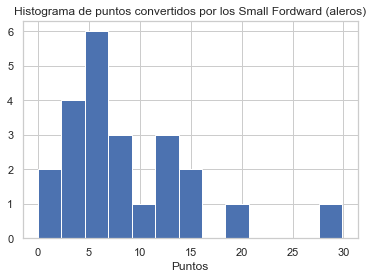

In [55]:
x=df_final['Posición']== 'Small Forward'
Small_Fordward= df_final[x]
# Histograma de puntos convertidos por los Small_Fordward

x=Small_Fordward['Puntos']
plt.xlabel("Puntos")

plt.hist([x],bins = 13) 
plt.title("Histograma de puntos convertidos por los Small Fordward (aleros)")


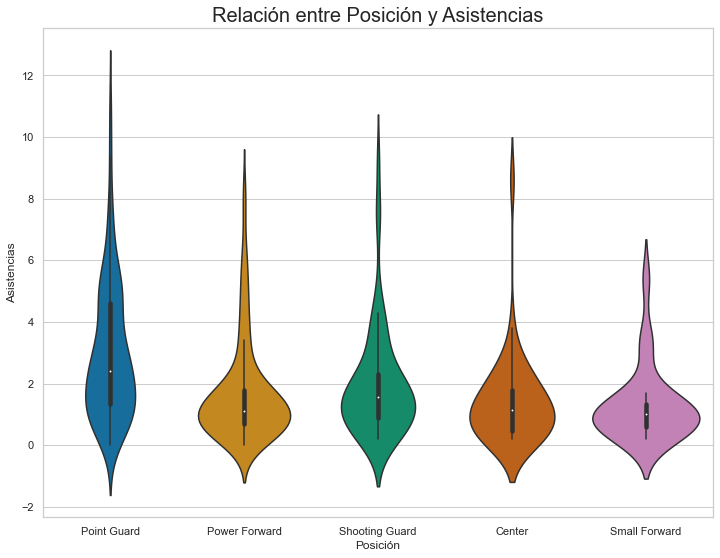

In [57]:
# Comparamos el promedio de asistencias en función de la posición de los jugadores.
# Vemos que los Point guard (bases o armadores) concentran la mayor cantidad de asistencias en promedio.
# Por otro lado, vemos que los small forward (aleros) concentran en promedio la menor cantidad de asistencias.

plt.rcParams['figure.figsize'] = (12, 9)
sns.violinplot(df_final['Posición'], df_final['Asistencias'], palette = 'colorblind')
plt.title('Relación entre Posición y Asistencias', fontsize = 20, fontweight = 30)
plt.show()

In [58]:
# Vemos el promedio de puntos en función de la posición del jugador

data_prueba=df_final[['Posición','Puntos']]
data1=data_prueba.groupby('Posición').agg('mean')

data1

,Puntos
Posición,
Center,8.795000
Point Guard,10.889041
Power Forward,9.055172
Shooting Guard,9.337500
Small Forward,8.826087


In [59]:
# Realizando otro tipo de análisis, podemos agrupar a los jugadores en función de su categoría de valor y mediana de puntos 
# convertidos

df_final_tabla = df_final.rename(columns={'Nombre_jugador':'Cantidad'})
Cluster_puntos_valor=df_final_tabla.groupby(['Valor_jugador_dis']).agg({'Puntos': 'median','Cantidad': 'count'})
Cluster_puntos_valor

,Puntos,Cantidad
Valor_jugador_dis,,
0,5.50,248
1,10.05,82
2,14.30,45
3,20.50,36
4,25.30,7


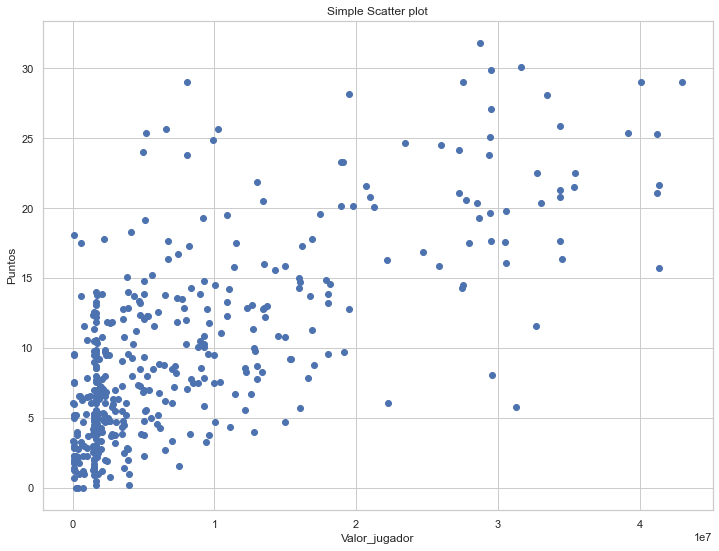

In [60]:
# Con un scatter vemos que la mayoría de los jugadores de la temporada 2020-2021 tienen un valor inferior a $10.000.000

plt.scatter(df_final['Valor_jugador'], df_final['Puntos'])
#plt.rcParams.update({'figure.figsize':(10,8), 'figure.dpi':100})
plt.title('Simple Scatter plot')
plt.xlabel('Valor_jugador')
plt.ylabel('Puntos')
plt.show()

<AxesSubplot:xlabel='Posición', ylabel='Puntos'>

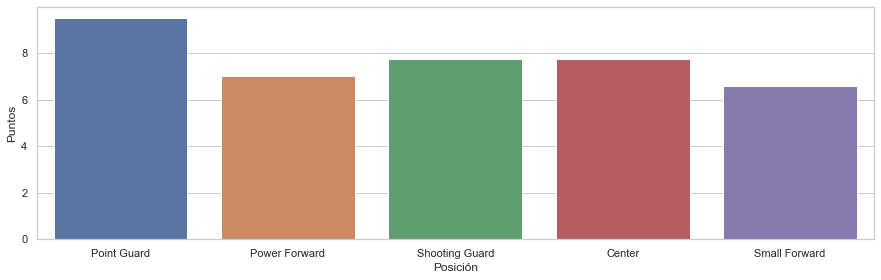

In [61]:
# Calculamos la mediana de puntos convertidos por posición en la cancha. Vemos que los jugadores en el puesto de point guard
# (armadores) anotan más puntos que el resto, mientras que los small forward anotan menos.

dims = (15, 4.27)
fig, ax = plt.subplots(figsize=dims)
sns.barplot(x = 'Posición',
            y = 'Puntos',
            data = df_final,
            estimator = np.median,
            ci=0)

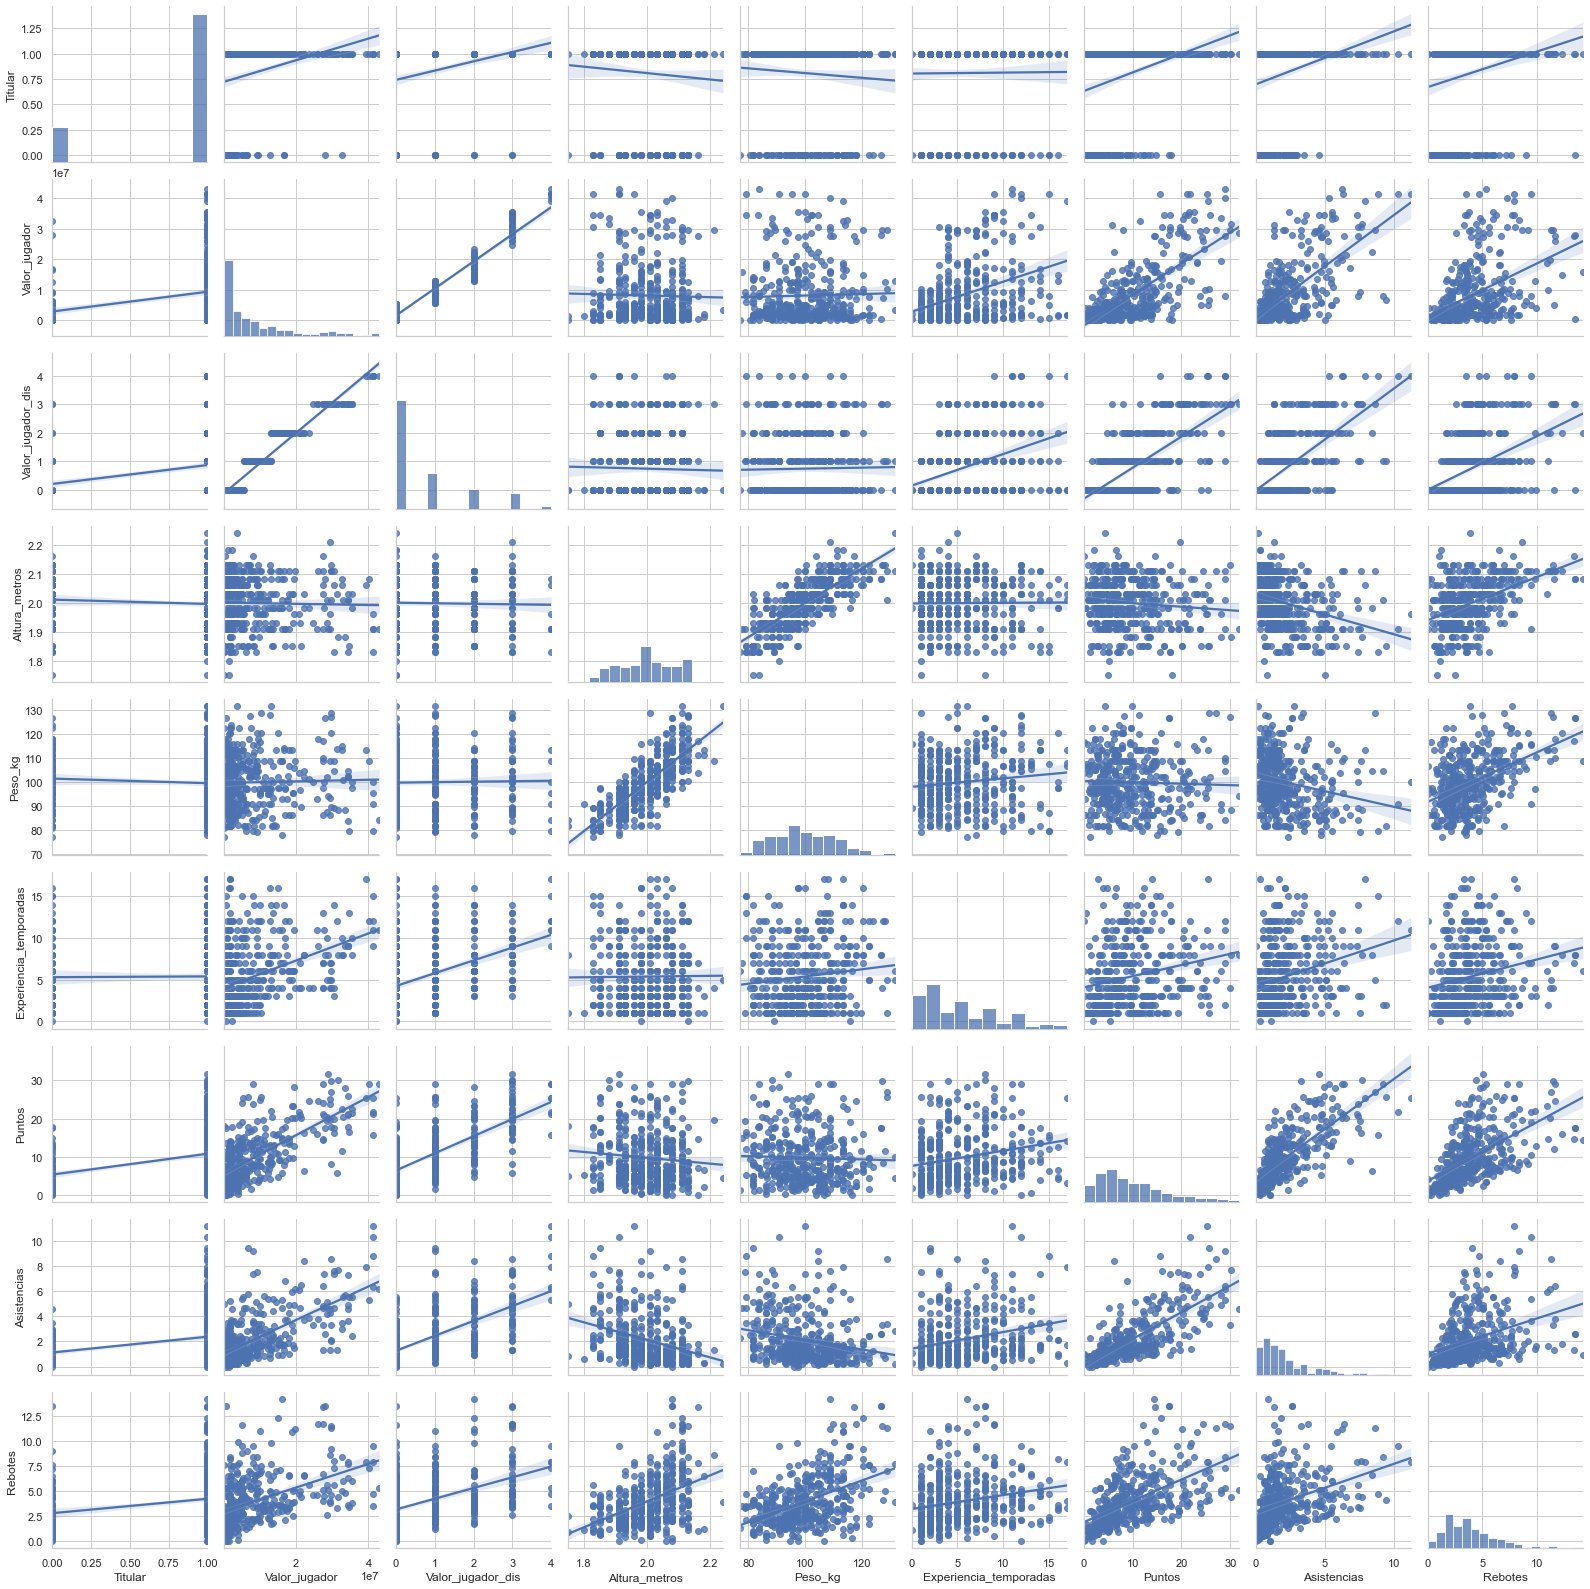

In [62]:
# Creamos un diagrama de dispersión por pares para ver cómo se correlacionan las distintas variables del dataset.
# Se pueden apreciar distintas correlaciones, pero necesitamos estar segur@s de cuán positiva o negativa es esa correlación.

sns.pairplot (df_final,kind = 'reg')
plt.show ()

<AxesSubplot:>

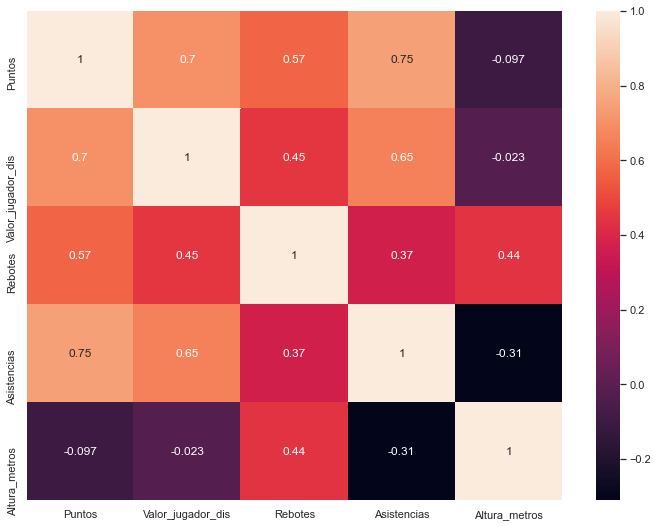

In [63]:
# Para obtener una mejor visualización, crearémos un mapa de calor de las columnas de Puntos, Valor_jugador_dis, Rebotes,
# Asistencias y Altura_metros con la intención de ver cuán positivas y/o negativas son las correlaciones.
# Podemos ver que la variable Altura_metros tiene una débil correlación con las otras variables, mientras que la
# variable Rebotes tiene una correlación media con las resantes variables.

correlación = df_final [["Puntos", "Valor_jugador_dis", "Rebotes","Asistencias","Altura_metros"]]. corr () 
sns.heatmap (correlación, annot = True )

In [64]:
# Calculamos el promedio de puntos de todo el df

df_final.loc [:,"Puntos"]. mean ()

9.70143540669857

In [65]:
# Calculamos el promedio de puntos en función de la categoría del valor de mercado del jugador. 
# Podemos ver que los jugadores que se encuentran en las categorías 3 y 4 tienen en promedio más del doble de 
# puntos por partido que los restantes.

Promedio_puntos_por_valordis = df_final.groupby(['Valor_jugador_dis']).agg({'Puntos': 'mean'}).reset_index()
Promedio_puntos_por_valordis

,Valor_jugador_dis,Puntos
0,0,6.425403
1,1,10.887805
2,2,14.715556
3,3,20.541667
4,4,23.885714


In [66]:
# Calculamos el promedio de asistencias de todo el df

df_final.loc [:,"Asistencias"]. mean ()

2.1332535885167463

In [67]:
# Calculamos el promedio de asistencias en función de la categoría del valor de mercado del jugador. 
# Podemos ver que los jugadores que se encuentran en las categorías 3 y 4 tienen en promedio más del doble de 
# asistencias por partido que los restantes.

Promedio_asistencias_por_valordis = df_final.groupby(['Valor_jugador_dis']).agg({'Asistencias': 'mean'}).reset_index()
Promedio_asistencias_por_valordis

,Valor_jugador_dis,Asistencias
0,0,1.281855
1,1,2.512195
2,2,3.304444
3,3,4.530556
4,4,8.000000


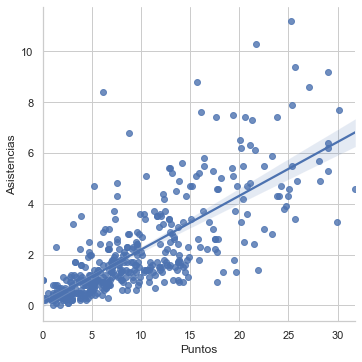

In [68]:
# Realizamos un gráfico de correlación lineal entre las variables Puntos y Asistencias. Establecemos un intervalo de confianza
# del 90%. La zombra de la recta sirve para predecir el valor del eje Y en función de la variación de los valores del eje x.
# En este caso, existe un 90% de confianza de que los valores del eje y se encuentren en la zona sombreada por arriba
# y por debajo de la línea.

sns.lmplot(x='Puntos',
           y='Asistencias',
           data=df_final, 
           order = 1, 
           ci = 90
          )

In [69]:
# Vemos los resultados de la regresión lineal entre las variables Puntos y Asistencias a partir del siguiente cuadro.

# En este caso, el p-value es igual a 0 (menor a 0.05) y el valor de beta es 0,21 (pendiente positiva). Por convención 
# estadística esto explica que existe una relación lineal ya positiva, es decir que no existe un porcentaje significativo 
# como para suponer que el valor del coef. B sea igual 0 (lo que significaría que la pendiente de la recta de la regresión
# sería prácticamente nula).
# Asimismo, miramos el intervalo de confianza. Entendemos que con una probabilidad del 95% el el valor del coeficiente B 
# (la pendiente) se encuentra entre los valores 0.1938 y 0.2301. Esto quiere decir que, con un alto nivel de confianza, 
# la pendiente (valor del coef. B) no estará comprendida en un intervalo de confianza que incluya al valor cero.
 
# Por último, confirmamos esta suposición estadística al observar el valor del R2. Este coeficiente muestra qué porcentaje
# del total de las variaciones de la variable Y son explicadas por la variable X. Es decir, representa el porcentaje de 
# variabilidad de los datos explicado por el modelo de regresión lineal. Se espera que R2 sea mas de 0,50, según el modelo. 
# En este caso el R2 es 0,56, lo que significa que un 56% de la variación total de los valores de Y (asistencias) son 
# explicados por el cambio en los valores de X (puntos).

# Podríamos concluir que los jugadores que más se esfuerzan por anotar puntos, más pases de asistencia realizan a sus compañeros.
# Esto se puede deber a que los jugadores estrella del equipo son los que más contacto tienen con el balón, teniendo la
# oportunidad de anotar puntos y asistir en muchas ocaciones a sus compañeros.

lm = pg.linear_regression(df_final['Puntos'],df_final['Asistencias'], remove_na=True)
lm.round(4)

,names,coef,se,T,pval,r2,adj_r2,CI[2.5%],CI[97.5%]
0,Intercept,0.0771,0.1094,0.7046,0.4815,0.5589,0.5578,-0.1380,0.2922
1,Puntos,0.2119,0.0092,22.9584,0.0000,0.5589,0.5578,0.1938,0.2301


In [70]:
# Procedemos a realizar un modelo de regresión lineal

model = linear_model.LinearRegression() 
                               

# X variable explicativa
X = np.array(df_final['Puntos']).reshape(-1,1)
        
# variable respuesta
y = np.array(df_final['Asistencias']).reshape(-1,1)


model.fit(X,y) 

LinearRegression()

In [71]:
model.intercept_, model.coef_
# intercept= valor de A | coef= valor de B. Con estos dos comandos encontramos el valor de los dos coeficientes
# Si volvemos a ver más arriba los valores de a y b vemos que se acercan.

(array([0.0771065]), array([[0.21194256]]))

In [72]:
r2 = model.score(X,y)  # La funcion score devuelve el R2 del modelo. Si miramos arriba era 0.6048.
r2

0.5588955339872193

In [73]:
# Para predecir nuevos valores. La novedad se encuentra aquí. Una vez que ya sé con qué porcentaje el modelo ajusta los 
# datos, puedo empezar a predecir nuevos valores de y.

y_pred = [5,15,33,11,23]

## Predecir: predict(). Predice el valor que quiero averiguar.
pred = model.predict(np.array(y_pred).reshape(-1,1))  

print('prediccion de Y:',pred,sep='\n') # sep'\n' me permite ajustar los resultado en la línea de abajo

# Para 5 puntos, me predijo 1.14 asistencias, para 33 puntos me predijo 7.07 asistencias, etc.

prediccion de Y:
[[1.13681932]
 [3.25624495]
 [7.07121109]
 [2.4084747 ]
 [4.95178546]]


In [74]:
# Si quiero predecir solo un valor:

y_pred = [51]


pred = model.predict(np.array(y_pred).reshape(-1,1))  
print(pred,sep='\n')

[[10.88617723]]


In [75]:
#Regresion lineal con varias caracteristicas

from sklearn.model_selection import train_test_split

X = df_final[['Valor_jugador_dis', 'Puntos', 'Rebotes']]
y = df_final['Asistencias']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [76]:
#Creamos el modelo

from sklearn.linear_model import LinearRegression
linear_model = LinearRegression(normalize=True).fit(X_train, y_train)

In [77]:
print('Training score: ', linear_model.score(X_train, y_train))

Training score:  0.5989510922422083


In [78]:
linear_model.coef_

array([ 0.5188123 ,  0.17086582, -0.04019655])

In [79]:
linear_model.intercept_

0.2670836661598941

In [80]:
coeff_df = pd.DataFrame(linear_model.coef_, X.columns, columns=['Coefficient'])
coeff_df

,Coefficient
Valor_jugador_dis,0.518812
Puntos,0.170866
Rebotes,-0.040197


In [81]:
#Coeficientes
predictors = X_train.columns
coef = pd.Series(linear_model.coef_, predictors).sort_values()

print(coef)

Rebotes             -0.040197
Puntos               0.170866
Valor_jugador_dis    0.518812
dtype: float64


In [82]:
#Realizamos las predicciones
y_pred = linear_model.predict(X_test)

In [83]:
print('Puntaje Testing', r2_score(y_test, y_pred))

Puntaje Testing 0.5859552106197099


In [84]:
# Para comparar los valores de salida reales X_test con los valores predichos, convertimos en df:

df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df

,Actual,Predicted
44,0.3,0.255025
363,1.1,1.382751
39,5.7,6.431907
376,0.6,0.968666
76,2.6,4.271019
...,...,...
58,0.5,0.939508
350,0.5,0.763615
335,2.4,2.410982
27,0.8,1.069169


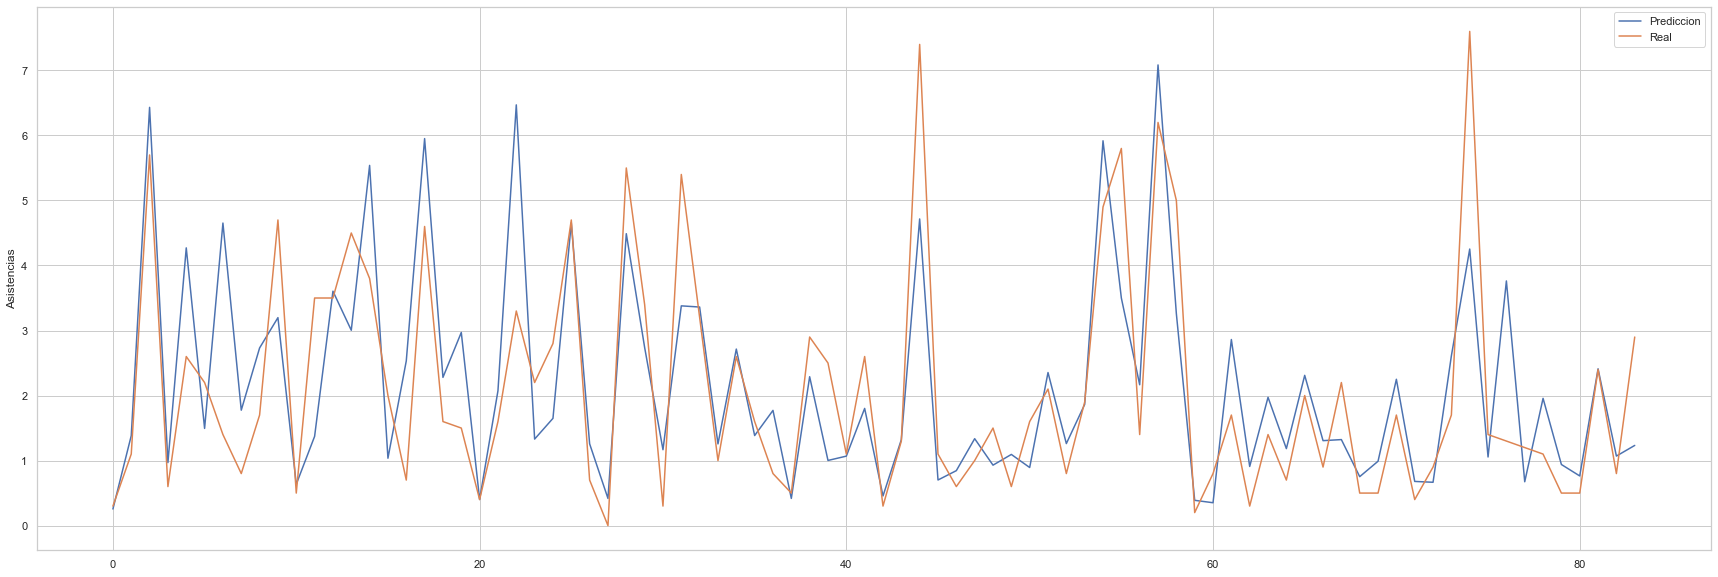

In [85]:
#Ploteamos
plt.figure(figsize = (30,10))

plt.plot(y_pred, label='Prediccion')
plt.plot(y_test.values, label='Real')

plt.ylabel('Asistencias')

plt.legend()
plt.show()

#plt.rcParams.update({'figure.figsize':(10,8), 'figure.dpi':100})

In [86]:
#Evaluación de Modelos
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.8272276531694522
Mean Squared Error: 1.2763441147056114
Root Mean Squared Error: 1.1297540062799563


# 4. Análisis multivariado

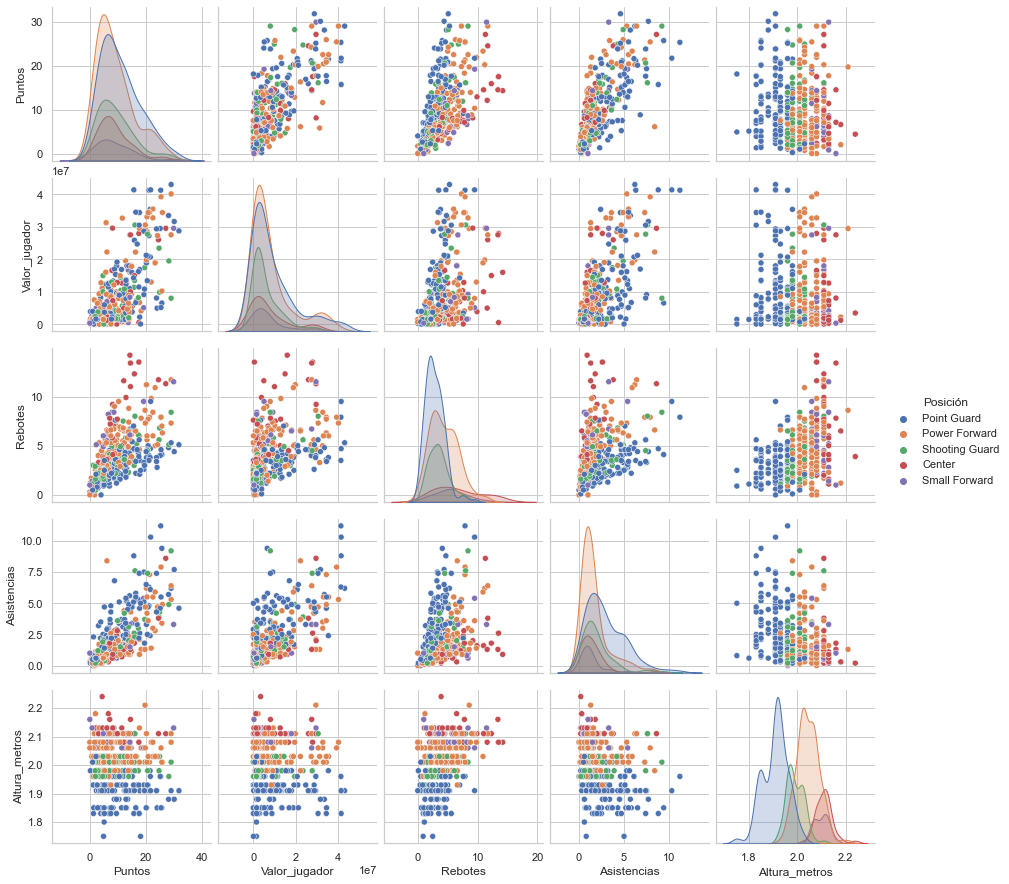

In [87]:
# Analizaremos el cruce de variables puntos, valor jugador y posición. Podemos ver en una primera vista que hay una correlación
# entre los puntos promedios anotados y el valor de los jugadores como mencionamos anteriormente. Esta vez lo cruzamos con la
# variable Posición para ver cómo se distribuyen los puntos en el gráfico en función de la posición del jugador.
# Podemos ver que Shooting Guard (color verde) se concentra mayormente entre 0 y 1E7. Lo veremos en mayor detalle en el 
# siguiente gráfico.

df=df_final [["Puntos", "Valor_jugador", "Rebotes","Asistencias","Altura_metros",'Posición']]
sns.pairplot (df,hue='Posición')
plt.show ()

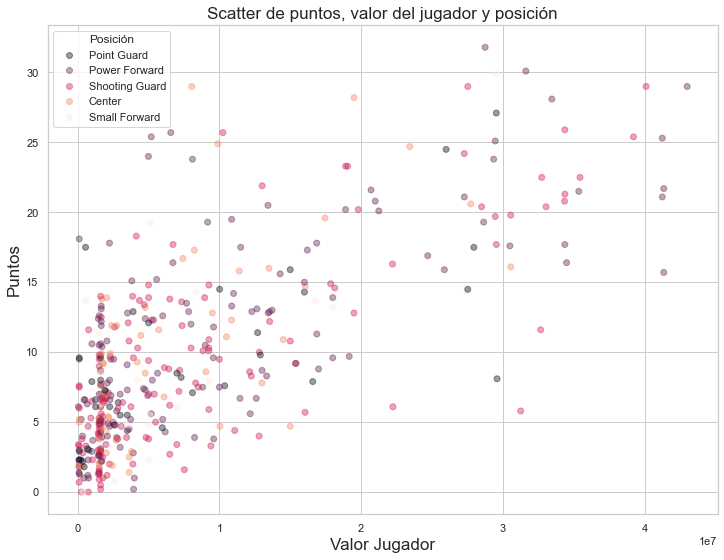

In [88]:
# En este gráfico vemos que shooting guard (color rojo) se concentra efectivamente entre  0 y 1E7, lo que quiere decir que
# el valor de los jugadores se encuentra en su mayoría por debajo de los $10.000.000. Podemos observar que muchos jugadores 
# tienen un promedio de puntos en la temporada 2020-2021 similar o supérior a estrellas de la NBA, pero con valores de mercado
# considerablemente más bajo.

# Asimismo, notamos que podemos proceder a realizar un análisis más profundo respecto a qué características tienen los
# jugadores con valores de mercado más bajos pero que anotaron el mismo promedio de puntos que los jugadores con valores muchos
# más altos (generalmente las estrellas de la NBA)

import itertools
colors = itertools.cycle(["r", "b", "g"])

scatter =plt.scatter(df_final['Valor_jugador'], df_final['Puntos'],c=df_final.Posición.astype('category').cat.codes,marker="o",alpha=0.4)
nombres_posición = ['Point Guard', 'Power Forward', 'Shooting Guard','Center','Small Forward']
plt.legend(handles=scatter.legend_elements()[0], labels=nombres_posición,
           title="Posición")

#plt.rcParams.update({'figure.figsize':(10,8), 'figure.dpi':100})
plt.title('Scatter de puntos, valor del jugador y posición',size=17)
plt.xlabel('Valor Jugador', size=17)
plt.ylabel('Puntos',size=17)
plt.show()

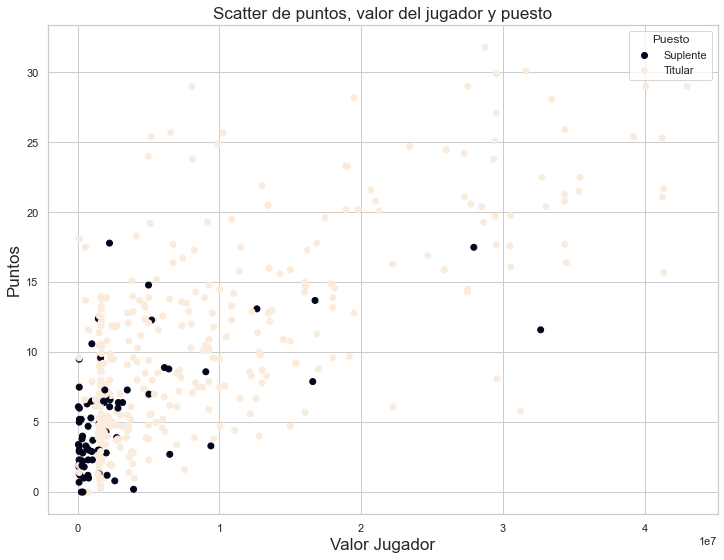

In [89]:
# Realizamos el mismo gráfico pero esta vez para visualizar la distribución de los jugadores suplentes y titulares en función 
# de su valor de mercado y el promedio de puntos convertidos.

import itertools
colors = itertools.cycle(["r", "y"])

scatter =plt.scatter(df_final['Valor_jugador'], df_final['Puntos'],c=df_final.Titular.astype('category').cat.codes,marker="o",alpha=1)
nombres_titular = ['Suplente','Titular']
plt.legend(handles=scatter.legend_elements()[0], labels=nombres_titular,
           title="Puesto")

#plt.rcParams.update({'figure.figsize':(10,8), 'figure.dpi':100})
plt.title('Scatter de puntos, valor del jugador y puesto',size=17)
plt.xlabel('Valor Jugador', size=17)
plt.ylabel('Puntos',size=17)
plt.show()

# 
# 4. Implementación de Modelos de Machine Learning

# Modelo de Clasificación No Supervizado - k-means clustering

In [90]:
# Teniendo en cuenta el gráfico anterior, interpretamos que la mejor decisión consiste en crear 3 grupos de jugadores usando 
# el modelo de aprendizaje automático llamado KMeans para mostrar qué grupo de jugadores son más similares. 
# Primero necesitamos crear el modelo y almacenarlo en una variable llamada kmeans_model. 

kmeans_model = KMeans (n_clusters = 3, init = 'k-means++',random_state = 42)


<AxesSubplot:xlabel='Valor_jugador', ylabel='Density'>

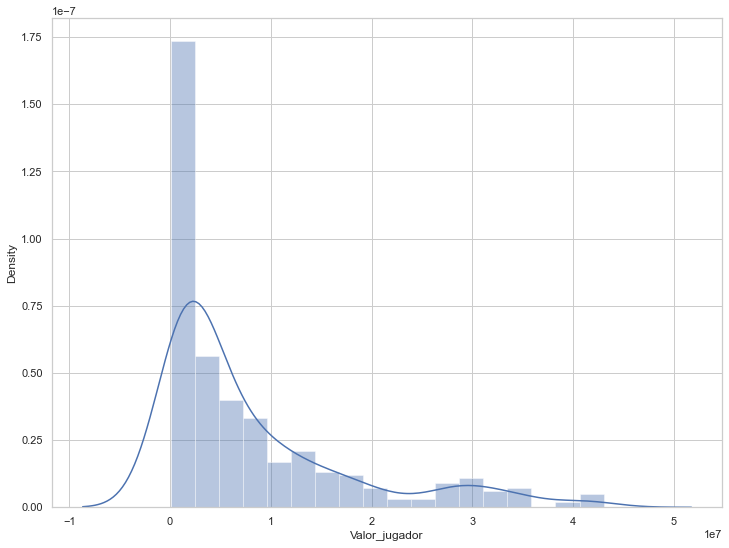

In [91]:
# En segundo lugar, necesitamos elegir las columnas numéricas del df_final. Por lo cual procederemos a analizar su distribución
# y decidir si es convenientes normalizarlas para optimizar el modelo.
#plt.rcParams.update({'figure.figsize':(10,8), 'figure.dpi':45})

sns.distplot(df_final['Valor_jugador'])

<AxesSubplot:xlabel='Puntos', ylabel='Density'>

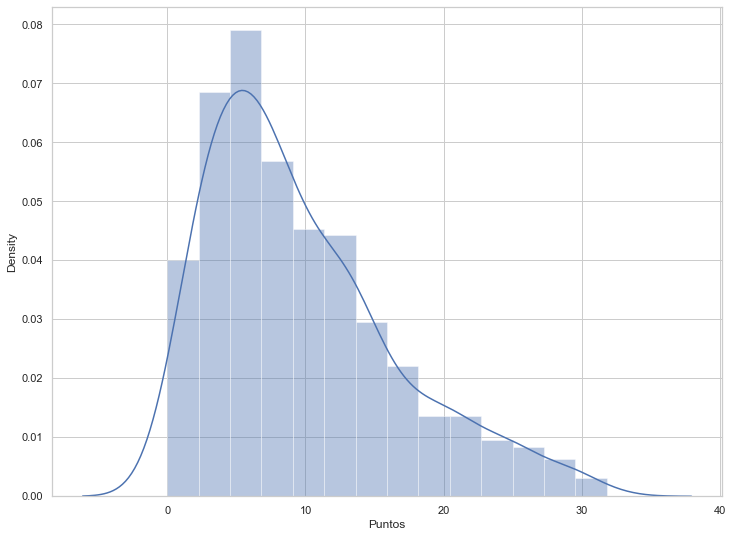

In [92]:
# Apreciamos distribuciones asimétricas en los dos casos

sns.distplot(df_final['Puntos'])

In [93]:
# Realizamos transformaciones lineales a las variables Puntos y Valor_jugador para normalizar sus valores debido a que 
# presentan distribuciones asimétricas por valores outliers altos. 

import numpy as np

import matplotlib as mpl
from matplotlib import pyplot as plt
from matplotlib import cm

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import minmax_scale
from sklearn.preprocessing import MaxAbsScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import QuantileTransformer
from sklearn.preprocessing import PowerTransformer

from sklearn.datasets import fetch_california_housing
!pip install plotly
import plotly.express as px

# Necesitamos convertir los valores de las variables elegidas a una estructura numpy

Variables= df_final[['Valor_jugador','Puntos']].to_numpy()

# Eligimos la técnica de normalización RobustScaler

Rob=RobustScaler().fit_transform(Variables)
Rob

array([[ 1.53079270e+00,  1.95402299e-01],
       [-2.32076198e-01, -4.59770115e-01],
       [-2.51936046e-01, -7.35632184e-01],
       [ 6.60623978e-02,  3.79310345e-01],
       [ 1.31446863e+00,  7.35632184e-01],
       [ 1.69303576e+00,  5.63218391e-01],
       [ 3.86654676e-01,  1.01149425e+00],
       [ 3.13750488e-02,  1.19540230e+00],
       [-1.17389070e-01,  4.59770115e-01],
       [-3.35577425e-01, -6.43678161e-01],
       [ 9.94844673e-02, -6.89655172e-02],
       [ 4.49172333e-01,  4.71264368e-01],
       [-2.40840460e-01, -4.25287356e-01],
       [ 9.01135085e-01, -2.64367816e-01],
       [ 2.94695312e-01,  2.04597701e+00],
       [-2.51936046e-01, -3.21839080e-01],
       [-4.06080361e-01, -7.01149425e-01],
       [ 1.47130358e+00,  1.34482759e+00],
       [-1.45852992e-01, -3.33333333e-01],
       [-3.03734954e-01, -6.43678161e-01],
       [ 2.11892378e+00,  1.93103448e+00],
       [ 6.54368697e-01,  1.95402299e+00],
       [ 3.30238953e+00,  1.12643678e+00],
       [-1.

(array([23., 43., 45., 48., 51., 34., 29., 26., 33., 15.,  9., 11., 14.,
         9.,  6.,  9.,  3.,  3.,  6.,  1.]),
 array([-0.90804598, -0.72528736, -0.54252874, -0.35977011, -0.17701149,
         0.00574713,  0.18850575,  0.37126437,  0.55402299,  0.73678161,
         0.91954023,  1.10229885,  1.28505747,  1.46781609,  1.65057471,
         1.83333333,  2.01609195,  2.19885057,  2.3816092 ,  2.56436782,
         2.74712644]),
 <BarContainer object of 20 artists>)

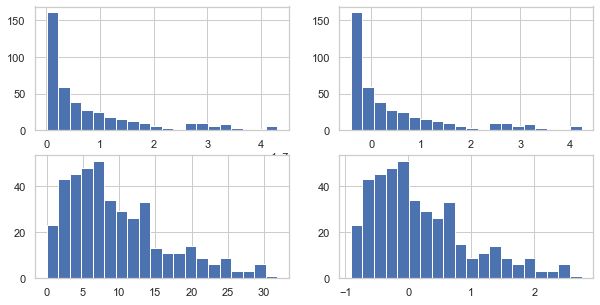

In [94]:
# No pudimos normalizar las variables y los outliers tienen mucho peso. Necesitamos aplicar una transformación no lineal

plt.figure(figsize=(10,5))
plt.subplot(221)
scaler = StandardScaler()
plt.hist(Variables[:,0],bins=20)
plt.subplot(222)
plt.hist(Rob[:,0],bins=20)
plt.subplot(223)
plt.hist(Variables[:,1],bins=20)
plt.subplot(224)
plt.hist(Rob[:,1],bins=20)



In [95]:
# Elegimos la técnia no lineal de Quantile transformer para normalizar nuestras variables elegidas.
# Asimismo, elgimos que la distribución resultante de la transformación sea "normal" para garantizar normalidad y 
# homogeneidad en la distribución de las variables.

Variables_Normal=QuantileTransformer(output_distribution='normal').fit_transform(Variables)
Variables_Normal


array([[ 1.07902734e+00,  2.30445249e-01],
       [-5.04501693e-01, -8.32235943e-01],
       [-9.15913567e-01, -1.61868253e+00],
       [ 7.52095807e-02,  3.97976536e-01],
       [ 9.62633629e-01,  8.11173247e-01],
       [ 1.16949008e+00,  5.84694731e-01],
       [ 3.91478409e-01,  1.01155557e+00],
       [ 4.50985252e-02,  1.16355520e+00],
       [-1.53888259e-01,  4.70651410e-01],
       [-1.27746296e+00, -1.29117591e+00],
       [ 1.02367187e-01, -9.93463111e-02],
       [ 4.20855076e-01,  4.84124715e-01],
       [-6.83953077e-01, -7.62028214e-01],
       [ 7.30265655e-01, -4.20855076e-01],
       [ 3.21011813e-01,  1.93689816e+00],
       [-9.15913567e-01, -5.35468203e-01],
       [-2.59018896e+00, -1.53534038e+00],
       [ 1.05250930e+00,  1.22487187e+00],
       [-2.08892225e-01, -5.56399691e-01],
       [-1.15180678e+00, -1.29117591e+00],
       [ 1.26398611e+00,  1.71507796e+00],
       [ 6.02618380e-01,  1.74184956e+00],
       [ 1.93689816e+00,  1.10632672e+00],
       [-2.

(array([ 3.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  2.,  3.,  5.,
        12., 13., 26., 27., 34., 39., 46., 41., 40., 35., 30., 21., 15.,
        11.,  7.,  5.,  1.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         1.]),
 array([-5.19933758e+00, -4.93937070e+00, -4.67940382e+00, -4.41943695e+00,
        -4.15947007e+00, -3.89950319e+00, -3.63953631e+00, -3.37956943e+00,
        -3.11960255e+00, -2.85963567e+00, -2.59966879e+00, -2.33970191e+00,
        -2.07973503e+00, -1.81976815e+00, -1.55980127e+00, -1.29983440e+00,
        -1.03986752e+00, -7.79900637e-01, -5.19933758e-01, -2.59966879e-01,
         4.89217555e-11,  2.59966879e-01,  5.19933758e-01,  7.79900637e-01,
         1.03986752e+00,  1.29983440e+00,  1.55980127e+00,  1.81976815e+00,
         2.07973503e+00,  2.33970191e+00,  2.59966879e+00,  2.85963567e+00,
         3.11960255e+00,  3.37956943e+00,  3.63953631e+00,  3.89950319e+00,
         4.15947007e+00,  4.41943695e+00,  4.67940382e+00,  4.93937070e+00,
      

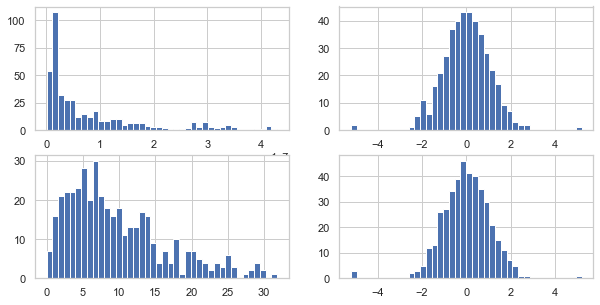

In [96]:
# Logramos una transformación robusta y estable al normalizar los datos más allá de la presencia de outliers. 

plt.figure(figsize=(10,5))
plt.subplot(221)
scaler = StandardScaler()
plt.hist(Variables[:,0],bins=40)
plt.subplot(222)
plt.hist(Variables_Normal[:,0],bins=40)
plt.subplot(223)
plt.hist(Variables[:,1],bins=40)
plt.subplot(224)
plt.hist(Variables_Normal[:,1],bins=40)




In [97]:
# Luego de normalizar nuestras variables, las guardamos en la variable Columnas_elegidas para continuar con el modelo. 
# El paso siguiente consiste en entrenar el modelo en función de los datos de la variable 'Columnas_elegidas'.

# Una vez que termine el entrenamiento, obtendremos las etiquetas del modelo y las almacenaremos en una variable llamada 
# labels e imprimiremos las etiquetas para cada fila de datos. 
# Las etiquetas serán clasificadores de 0 a 2, ya que queremos 3 clústeres.

kmeans_model = KMeans (n_clusters = 3, init = 'k-means++',random_state = 42)
Columnas_elegidas = Variables_Normal
kmeans_model.fit_predict(Columnas_elegidas) 
labels = kmeans_model.labels_
labels

array([2, 1, 1, 0, 2, 2, 2, 2, 0, 1, 0, 0, 1, 0, 2, 1, 1, 2, 0, 1, 2, 2,
       2, 1, 2, 0, 1, 0, 0, 1, 1, 0, 2, 0, 1, 2, 0, 2, 2, 2, 0, 2, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 2, 1, 0, 0, 0, 0, 2, 0, 0,
       0, 0, 0, 1, 2, 2, 0, 2, 0, 2, 2, 0, 0, 2, 0, 2, 1, 0, 1, 0, 0, 2,
       1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 2, 2, 2, 0, 1, 0, 2, 1, 2, 0, 0,
       0, 2, 0, 0, 1, 2, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 1, 1, 2, 0,
       0, 0, 0, 0, 0, 2, 1, 2, 0, 0, 1, 1, 1, 2, 0, 1, 0, 0, 1, 2, 1, 2,
       0, 0, 1, 0, 2, 2, 0, 0, 0, 1, 1, 0, 0, 1, 2, 0, 2, 1, 1, 0, 2, 0,
       0, 0, 1, 2, 0, 0, 0, 1, 0, 1, 2, 1, 1, 2, 1, 1, 1, 0, 2, 0, 0, 0,
       2, 0, 0, 1, 0, 2, 2, 0, 0, 0, 2, 0, 2, 0, 0, 0, 0, 1, 0, 1, 0, 2,
       0, 2, 2, 0, 1, 0, 0, 0, 0, 1, 2, 0, 0, 0, 2, 1, 0, 0, 2, 2, 0, 0,
       1, 1, 1, 2, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0, 2, 1,
       2, 1, 0, 2, 0, 0, 0, 0, 1, 0, 1, 2, 0, 0, 0, 0, 2, 1, 1, 1, 1, 2,
       0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0,

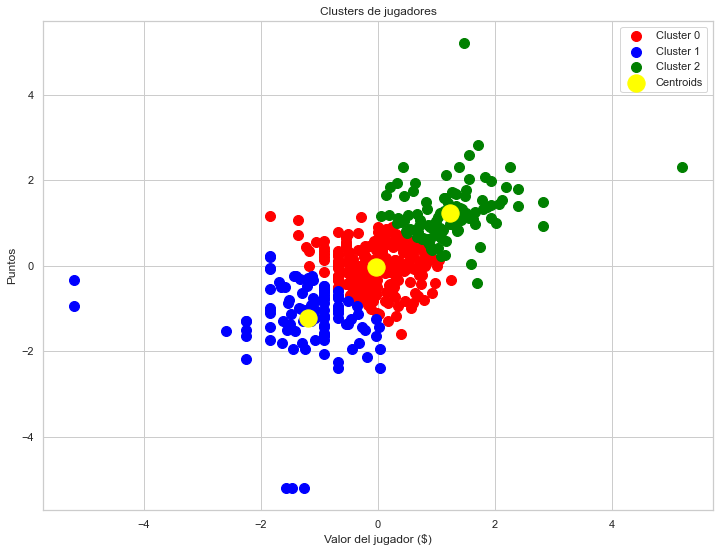

In [98]:
# Visualizacion grafica de los clusters

plt.scatter(Columnas_elegidas[labels == 0, 0], Columnas_elegidas[labels == 0, 1], s = 100, c = 'red', label = 'Cluster 0')
plt.scatter(Columnas_elegidas[labels == 1, 0], Columnas_elegidas[labels == 1, 1], s = 100, c = 'blue', label = 'Cluster 1')
plt.scatter(Columnas_elegidas[labels == 2, 0], Columnas_elegidas[labels == 2, 1], s = 100, c = 'green', label = 'Cluster 2')


plt.scatter(kmeans_model.cluster_centers_[:, 0], kmeans_model.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')

plt.title('Clusters de jugadores')
plt.xlabel('Valor del jugador ($)')
plt.ylabel('Puntos')
plt.legend()
plt.show()

#### Insights:

Podemos ver que existen tres grupos de jugadores. Estos son los azules, rojos y los verdes.
Teniendo en cuenta que trabajamos con datos normalizados, podemos observar que los azules tienen un promedio de puntos muy disperso y un valor de mercado bajo (se deduce que muchos son los jugadores suplentes o recién iniciados de los equipos). Por otro lado, el grupo de los verdes también encuentra disperso en el plano, donde encontramos que muchos jugadores tienen similares promedios de puntos que los azules pero una mayor valoración monetaria en el mercado (deducimos que son las estrellas de la NBA). Por último tenemos a los jugadores promedio de la temporada (grupo de los rojos), los cuales tienen un buen promedio de puntos y una valoración de mercado promedio en relación al resto.

Como una primera reflexión de los grupos, entendemos que, además del promedio de puntos en la temporada, existen otros atributos que hacen que la valoración del jugador en el mercado sea más elevada. Estos factores pueden ser la condición del jugador (titular o suplente, rookie o experimentado, MVP de la temporada, la posición del jugador, entre otros). 

Asimismo, la diferencia de puntos para los jugadores del grupo verde se puede deber a que pueden existir jugadores estrella que se lesionaron en la temporada, por lo que aportaron un menor promedio de puntos. Otra explicación que pensamos se puede relacionar al promedio de tiempo de juego del jugador.

In [99]:
# Implementaremos el esquema del método del codo (Elbow Method) para saber si acertamos al determinar un número óptimo de 𝑘.

sum_sq_d = []
K = range(1,11)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(Columnas_elegidas)
    sum_sq_d.append(km.inertia_)

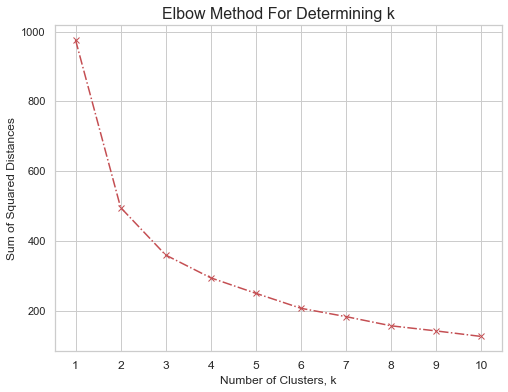

In [100]:
# Entendemos que fue correcta nuestra suposición inicial al elegir un número de 𝑘=3.

sum_sq_d = []
K = range(1,11)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(Columnas_elegidas)
    sum_sq_d.append(km.inertia_)
plt.figure(figsize=(8,6))
plt.plot(K, sum_sq_d, 'rx-.')
plt.xlabel('Number of Clusters, k', fontsize=12)
plt.xticks(range(1,11), fontsize=12)
plt.ylabel('Sum of Squared Distances', fontsize=12)
plt.xticks(fontsize=12)
plt.title('Elbow Method For Determining k', fontsize=16)
plt.show()

In [101]:
# Incorporaremos la categoría de cluster de cada jugador a nuestro df_final. Para ello, necesitamos hacer algunas 
# transformaciones sobre el objeto labels

type(labels)

numpy.ndarray

In [102]:
labels.dtype

dtype('int32')

In [103]:
cluster_df = pd.DataFrame(labels)
df_cluster = np.int64(cluster_df)
df_final['Cluster'] = df_cluster
df_final

,Nombre_equipo,Nombre_jugador,Titular,Detalle_contrato,Valor_jugador,Valor_jugador_dis,ID,Universidad,País,Altura_metros,Peso_kg,Experiencia_temporadas,Número_camiseta,Posición,Año_draft,Ronda_draft,Puntos,Asistencias,Rebotes,Cluster
0,Atlanta Hawks,Bogdan Bogdanovic,1,Guaranteed,18000000,2,203992,Fenerbahce,Serbia,1.98,99.773243,3,13,Point Guard,2014,1,9.6,2.3,3.3,2
1,Atlanta Hawks,Brandon Goodwin,1,Guaranteed,1701593,0,1629164,Florida Gulf Coast,USA,1.83,81.632653,2,0,Point Guard,Undrafted,Undrafted,3.9,1.6,1.0,1
2,Atlanta Hawks,Bruno Fernando,1,Guaranteed,1517981,0,1628981,Maryland,Angola,2.06,108.843537,1,24,Power Forward,2019,2,1.5,0.4,3.0,1
3,Atlanta Hawks,Cam Reddish,1,Guaranteed,4458000,0,1629629,Duke,USA,2.03,98.866213,1,22,Shooting Guard,2019,1,11.2,1.3,4.0,0
4,Atlanta Hawks,Clint Capela,1,Guaranteed,16000000,2,203991,Elan Chalon,Switzerland,2.08,108.843537,6,15,Center,2014,1,14.3,0.9,14.2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,Washington Wizards,Raul Neto,1,Guaranteed,1620564,0,203526,Murcia,Brazil,1.85,81.632653,5,19,Point Guard,2013,2,7.7,2.2,2.2,0
414,Washington Wizards,Robin Lopez,1,Guaranteed,7300000,1,201577,Stanford,USA,2.13,127.437642,12,15,Center,2008,1,8.2,0.9,4.1,0
415,Washington Wizards,Rui Hachimura,1,Guaranteed,4692840,0,1629060,Gonzaga,Japan,2.03,104.308390,1,8,Power Forward,2019,1,13.4,1.5,5.8,0
416,Washington Wizards,Russell Westbrook,1,Guaranteed,41358814,4,201566,UCLA,USA,1.91,90.702948,12,4,Point Guard,2008,1,21.7,10.3,9.5,2


In [104]:
# Identificaremos a qué color pertenece cada clasificación del cluster en función de comparar los promedios de puntos mínimos 
# y máximos de cada cluster.

# Promedio de puntos mínimos convertidos por cluster. Existen jugadores con promedio mínimos de puntos de entre 0 y 5.8 en la
# temporada 2020-2021.

Cluster_puntos=df_final.groupby(['Cluster']).agg({'Puntos': 'min'})
Cluster_puntos

,Puntos
Cluster,
0,1.6
1,0.0
2,5.8


In [105]:
# Promedio de puntos máximos convertidos por cluster. Existen jugadores con promedio máximos de puntos de entre 9.6 y 31.8 en la
# temporada 2020-2021.

Cluster_puntos=df_final.groupby(['Cluster']).agg({'Puntos': 'max'})
Cluster_puntos

,Puntos
Cluster,
0,18.1
1,9.6
2,31.8


##### Ahora sabemos que:
- El cluster 0 pertenece al grupo rojo (jugadores con rendimiento promedio)
- El cluster 1 al grupo azul (jugadores baratos/rookies)
- El cluster 2 al grupo verde (jugadores estrellas)

##### Sin embargo, procederemos a renombrar las categorías de los clusters para facilitar el análisis:

In [106]:
df_final.Cluster = df_final.Cluster.replace({0:"2", 1:"1", 2:"3"})
df_final

,Nombre_equipo,Nombre_jugador,Titular,Detalle_contrato,Valor_jugador,Valor_jugador_dis,ID,Universidad,País,Altura_metros,Peso_kg,Experiencia_temporadas,Número_camiseta,Posición,Año_draft,Ronda_draft,Puntos,Asistencias,Rebotes,Cluster
0,Atlanta Hawks,Bogdan Bogdanovic,1,Guaranteed,18000000,2,203992,Fenerbahce,Serbia,1.98,99.773243,3,13,Point Guard,2014,1,9.6,2.3,3.3,3
1,Atlanta Hawks,Brandon Goodwin,1,Guaranteed,1701593,0,1629164,Florida Gulf Coast,USA,1.83,81.632653,2,0,Point Guard,Undrafted,Undrafted,3.9,1.6,1.0,1
2,Atlanta Hawks,Bruno Fernando,1,Guaranteed,1517981,0,1628981,Maryland,Angola,2.06,108.843537,1,24,Power Forward,2019,2,1.5,0.4,3.0,1
3,Atlanta Hawks,Cam Reddish,1,Guaranteed,4458000,0,1629629,Duke,USA,2.03,98.866213,1,22,Shooting Guard,2019,1,11.2,1.3,4.0,2
4,Atlanta Hawks,Clint Capela,1,Guaranteed,16000000,2,203991,Elan Chalon,Switzerland,2.08,108.843537,6,15,Center,2014,1,14.3,0.9,14.2,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,Washington Wizards,Raul Neto,1,Guaranteed,1620564,0,203526,Murcia,Brazil,1.85,81.632653,5,19,Point Guard,2013,2,7.7,2.2,2.2,2
414,Washington Wizards,Robin Lopez,1,Guaranteed,7300000,1,201577,Stanford,USA,2.13,127.437642,12,15,Center,2008,1,8.2,0.9,4.1,2
415,Washington Wizards,Rui Hachimura,1,Guaranteed,4692840,0,1629060,Gonzaga,Japan,2.03,104.308390,1,8,Power Forward,2019,1,13.4,1.5,5.8,2
416,Washington Wizards,Russell Westbrook,1,Guaranteed,41358814,4,201566,UCLA,USA,1.91,90.702948,12,4,Point Guard,2008,1,21.7,10.3,9.5,3


##### Ahora sabemos que:
- El cluster 1 pertenece al grupo azul (jugadores baratos/rookies)
- El cluster 2 al grupo rojo (jugadores con rendimiento promedio)
- El cluster 3 al grupo verde (jugadores estrellas)

In [107]:
# Calculamos es la mediana de puntos por cluster para tener una medida de tendencia central.

Cluster_puntos=df_final.groupby('Cluster').agg({'Puntos': 'median'})
Cluster_puntos

,Puntos
Cluster,
1,2.85
2,7.85
3,18.05


In [108]:
# Calculamos cuál es la mediana de puntos convertidos por los jugadores en función de su grupo de pertenencia y su condición
# de titular o suplente.

# Podemos obvervar que los titulares del cluster 1 (grupo azul) tienen una menor mediana de puntos en la temporada que los
# suplentes del mismo grupo.

# Asimismo, los jugadores suplentes que se encuentran en el cluster 3 (jugadores estrellas) poseen una mediana de puntos 
# superior al de los jugadores titulares  del cluster 2 (jugadores promedio). Esto quiere decir que los jugadores estrellas que
# se encuentran en condición de suplentes tienen horarios más altos que jugadores promedio titulares debido a que los primeros 
# tienen un rendimiento de puntos superior.

Cluster_puntos_titular=df_final.groupby(['Cluster','Titular']).agg({'Puntos': 'median'})
Cluster_puntos_titular

Puntos
Cluster Titular        
1       0          2.90
        1          2.70
2       0          6.90
        1          8.00
3       0         13.40
        1         19.25

In [109]:
# Profundizando en el análisis del contenedor anterior, podemos ver el promedio mínimo de puntos convertidos en la temporada
# por los jugadores en función de su grupo de pertenencia y condición de titular o suplente.

# Podemos observar que existen muchos jugadores titulares del cluster 1 (jugadores baratos/rookies) que no convirtieron anotaciones 
# al margen de si fueron titulares o suplentes. Esto se puede deber a distintos motivos: error en el dataset, ausencia de 
# información, o que efectivamente no convirtieron puntos en la temporada.

# Por otro lado podemos ver que el promedio de puntos mínimos convertidos por los titulares del cluster 3 (jugadores estrellas)
# no es marcadamente muy superior al mínimo de puntos convertidos en la temporada por los titulares y suplentes del cluster 2 
# (jugadores promedio). Esto se puede deber a que existen jugadores de la NBA que tienen otros atributos diferentes a los de un
# jugador promedio, como por ejemplo su rol dentro del equipo, pudiendose dedicar a la defensa y no tanto a la anotación de 
# puntos.


Cluster_puntos_titular=df_final.groupby(['Cluster','Titular']).agg({'Puntos': 'min'})
Cluster_puntos_titular

Puntos
Cluster Titular        
1       0           0.0
        1           0.0
2       0           2.7
        1           1.6
3       0          11.6
        1           5.8

In [110]:
# Finalmente, vemos que el promedio de puntos máximos que anotaron los suplentes del cluster 3 (Estrellas de la NBA) no distan 
# mucho del promedio de puntos máximo que anotaron los titulares y suplentes del cluster 2 (jugadores promedio).
# Podemos deducir que existen jugadores de medio rendimiento que anotaron en la temporada un promedio de puntos muy similar a 
# los de un jugador estrella de la NBA.

# Por otro lado, vemos que existen jugadores titulares del cluster 2 (jugadores promedio) anotaron un promedio máximo de puntos
# superior al de los suplentes pertenecientes al cluster 3 (jugadores estrellas). Entendemos que esto se puede deber a que 
# pueden existir jugadores titulares que podrían convertirse en futuras estrellas de la NBA si mantienen ese promedio de puntos
# en las siguientes temporadas y consiguen mejorar su performance en otras características (ej: asistencias y rebotes).

Filtro_países_jugadores_caros=df_final.groupby(['Cluster','Titular']).agg({'Puntos': 'max'})
Filtro_países_jugadores_caros

Puntos
Cluster Titular        
1       0           9.5
        1           9.6
2       0          17.8
        1          18.1
3       0          17.5
        1          31.8

In [111]:
# Asimismo, podemos agrupar a los jugadores en función del grupo al que pertenecen y su categoría de valor para realizar más
# observaciones de los grupos.

# Notamos la presencia de jugadores con categorías de valor de 0, 1 y 2 pero con un promedio de puntos mínimo destacable dentro 
# del cluster 3. Podemos interpretar este cuadro teniendo en cuenta que existen muchos jugadores que son considerados estrellas
# muy bien valorados en la liga pero que tienen un valor de mercado promedio. Sin embargo, pertenecen al cluster 3 porque
# se destaca la cantidad promedio mímina de puntos convertidos en la temporada 2020-2021 (caso 0 y 1). Por otro lado, los casos
# 2 y 3 tienen menos puntos convertidos pero un valor de mercado alto, seguramente explicado por su desempeño en otros aspectos.
# Estos aspectos los podremos visualizar en la siguiente tabla.

df_final_tabla = df_final.rename(columns={'Nombre_jugador':'Cantidad'})
Cluster_puntos_valor=df_final_tabla.groupby(['Cluster','Valor_jugador_dis']).agg({'Puntos': 'min', 'Cantidad': 'min'})
Cluster_puntos_valor

Puntos        Cantidad
Cluster Valor_jugador_dis                        
1       0                     0.0      AJ Hammons
2       0                     2.3   Aaron Holiday
        1                     1.6      Alec Burks
        2                     4.7  Andre Iguodala
3       0                    18.3     Bam Adebayo
        1                    12.9  Darius Garland
        2                     9.6    Aaron Gordon
        3                     5.8      Al Horford
        4                    15.7      Chris Paul

In [112]:
# Misma tabla pero con jugadores con mayor promedio de puntos

df_final_tabla = df_final.rename(columns={'Nombre_jugador':'Cantidad'})
Cluster_puntos_valor=df_final_tabla.groupby(['Cluster','Valor_jugador_dis']).agg({'Puntos': 'max', 'Cantidad': 'max'})
Cluster_puntos_valor

Puntos         Cantidad
Cluster Valor_jugador_dis                         
1       0                     9.6   Zylan Cheatham
2       0                    18.1     Zach Collins
        1                    15.2       Tyus Jones
        2                     9.2      Ricky Rubio
3       0                    25.4     John Collins
        1                    29.0  Zion Williamson
        2                    28.2      Zach LaVine
        3                    31.8    Tobias Harris
        4                    29.0    Stephen Curry

In [113]:
# Profundizamos en el analisis que describimos anteriormente, agregando más información.
# Podemos ver la diferencia de rendimiento de los jugadores con categoría de valor baja en el cluster 3 (estrellas) respecto a 
# los jugadores de los otros grupos. Si bien algunos tienen categorías bajas de valor, superan ampliamente el mínimo de puntos,
# asistencias y rebotes

df_final_tabla = df_final.rename(columns={'Nombre_jugador':'Cantidad'})
Filtro_jugadores_características=df_final_tabla.groupby(['Cluster','Valor_jugador_dis']).agg({'Valor_jugador': 'min','Puntos': 'min','Asistencias': 'min', 'Rebotes': 'min', 'Experiencia_temporadas': 'min'})
Filtro_jugadores_características

Valor_jugador  Puntos  Asistencias  Rebotes  Experiencia_temporadas
Cluster Valor_jugador_dis                                                                     
1       0                          50000     0.0          0.0      0.0                       0
2       0                         110998     2.3          0.2      0.9                       0
        1                        5572680     1.6          0.3      1.2                       1
        2                       13013700     4.7          1.3      1.7                       7
3       0                        4137302    18.3          1.3      2.8                       2
        1                        6571800    12.9          0.9      2.2                       1
        2                       13015874     9.6          0.9      1.8                       3
        3                       24701834     5.8          1.3      2.6                       3
        4                       39219566    15.7          5.3      3.5                       9

In [114]:
# Vemos los valores de la tabla anterior en función de la mediana.

df_final_tabla = df_final.rename(columns={'Nombre_jugador':'Cantidad'})
Filtro_jugadores_características=df_final_tabla.groupby(['Cluster']).agg({'Valor_jugador': 'median','Puntos': 'median','Asistencias': 'median', 'Rebotes': 'median', 'Experiencia_temporadas': 'median','Cantidad': 'count'})
Filtro_jugadores_características

,Valor_jugador,Puntos,Asistencias,Rebotes,Experiencia_temporadas,Cantidad
Cluster,,,,,,
1,1444332.5,2.85,0.50,1.75,2,102
2,3680260.0,7.85,1.50,3.60,5,212
3,19105357.0,18.05,4.25,5.00,6,104


# Modelo de Clasificación Supervizado - Arbol de decisión (DT)

Para nuestro modelo de clasificación, realizaremos dos modelos predictivos que nos ayudarán a evaluar las distintas características de los jugadores para poder predecir si serán titulares o suplentes en la temporada. 

### Limpieza para implementación de DT

In [204]:
# Buscamos una muestra de jugadores titulares para visualizar algunos de sus atributos

columnas = df_final.loc[:,['Nombre_jugador','Cluster','Valor_jugador_dis','Valor_jugador','Puntos','Asistencias','Rebotes','Experiencia_temporadas']]

Titulares = columnas.loc [df_final ['Titular'] == 1 ,:]

Titulares.head(10)


,Nombre_jugador,Cluster,Valor_jugador_dis,Valor_jugador,Puntos,Asistencias,Rebotes,Experiencia_temporadas
0,Bogdan Bogdanovic,3,2,18000000,9.6,2.3,3.3,3
1,Brandon Goodwin,1,0,1701593,3.9,1.6,1.0,2
2,Bruno Fernando,1,0,1517981,1.5,0.4,3.0,1
3,Cam Reddish,2,0,4458000,11.2,1.3,4.0,1
4,Clint Capela,3,2,16000000,14.3,0.9,14.2,6
5,Danilo Gallinari,3,2,19500000,12.8,1.5,3.9,11
6,De'Andre Hunter,3,1,7422000,16.7,2.2,5.2,1
7,John Collins,3,0,4137302,18.3,1.3,7.8,3
8,Kevin Huerter,2,0,2761920,11.9,3.6,3.7,2
10,Kris Dunn,2,0,4767000,7.3,3.4,3.6,4


In [205]:
# Buscamos una muestra de jugadores suplentes para visualizar algunos de sus atributos

# Podemos ver que un jugador estrella perteneciente al grupo 3 como Blake Griffin fue suplente en la temporada 2020/2021 pero
# tiene cifras muy superiores al resto.

columnas = df_final.loc[:,['Nombre_jugador','Cluster','Valor_jugador_dis','Valor_jugador','Puntos','Asistencias','Rebotes','Experiencia_temporadas']]

Titulares = columnas.loc [df_final ['Titular'] == 0 ,:]

Titulares.head(10)

,Nombre_jugador,Cluster,Valor_jugador_dis,Valor_jugador,Puntos,Asistencias,Rebotes,Experiencia_temporadas
9,Khyri Thomas,1,0,744684,2.3,0.3,0.6,2
16,Demetrius Jackson,1,0,92857,1.8,0.7,0.7,3
19,Guerschon Yabusele,1,0,1039080,2.3,0.4,1.4,2
29,Alize Johnson,1,0,110998,2.0,0.4,2.8,2
30,Andre Roberson,1,0,163818,1.2,0.8,3.0,6
32,Blake Griffin,3,3,32670565,11.6,3.5,5.0,10
34,Iman Shumpert,1,0,447155,1.0,0.0,0.5,9
41,LaMarcus Aldridge,3,2,16750000,13.7,1.7,4.5,14
44,Noah Vonleh,1,0,263995,0.0,0.3,0.3,6
45,Norvel Pelle,1,0,217845,2.3,0.3,2.0,1


In [206]:
df_final_clas= df_final
df_final_clas

,Nombre_equipo,Nombre_jugador,Titular,Detalle_contrato,Valor_jugador,Valor_jugador_dis,ID,Universidad,País,Altura_metros,Peso_kg,Experiencia_temporadas,Número_camiseta,Posición,Año_draft,Ronda_draft,Puntos,Asistencias,Rebotes,Cluster
0,Atlanta Hawks,Bogdan Bogdanovic,1,Guaranteed,18000000,2,203992,Fenerbahce,Serbia,1.98,99.773243,3,13,Point Guard,2014,1,9.6,2.3,3.3,3
1,Atlanta Hawks,Brandon Goodwin,1,Guaranteed,1701593,0,1629164,Florida Gulf Coast,USA,1.83,81.632653,2,0,Point Guard,Undrafted,Undrafted,3.9,1.6,1.0,1
2,Atlanta Hawks,Bruno Fernando,1,Guaranteed,1517981,0,1628981,Maryland,Angola,2.06,108.843537,1,24,Power Forward,2019,2,1.5,0.4,3.0,1
3,Atlanta Hawks,Cam Reddish,1,Guaranteed,4458000,0,1629629,Duke,USA,2.03,98.866213,1,22,Shooting Guard,2019,1,11.2,1.3,4.0,2
4,Atlanta Hawks,Clint Capela,1,Guaranteed,16000000,2,203991,Elan Chalon,Switzerland,2.08,108.843537,6,15,Center,2014,1,14.3,0.9,14.2,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,Washington Wizards,Raul Neto,1,Guaranteed,1620564,0,203526,Murcia,Brazil,1.85,81.632653,5,19,Point Guard,2013,2,7.7,2.2,2.2,2
414,Washington Wizards,Robin Lopez,1,Guaranteed,7300000,1,201577,Stanford,USA,2.13,127.437642,12,15,Center,2008,1,8.2,0.9,4.1,2
415,Washington Wizards,Rui Hachimura,1,Guaranteed,4692840,0,1629060,Gonzaga,Japan,2.03,104.308390,1,8,Power Forward,2019,1,13.4,1.5,5.8,2
416,Washington Wizards,Russell Westbrook,1,Guaranteed,41358814,4,201566,UCLA,USA,1.91,90.702948,12,4,Point Guard,2008,1,21.7,10.3,9.5,3


In [207]:
# Eliminamos algunas variables que consideramos innecesarias para nuestro modelo.

df_final_clas_limpia= df_final_clas.drop(['Nombre_equipo',"Nombre_jugador",'Valor_jugador','Detalle_contrato','ID','Universidad','País','Número_camiseta','Ronda_draft','Año_draft','Peso_kg','Altura_metros','Valor_jugador_dis'], axis=1)
df_final_clas_limpia

,Titular,Experiencia_temporadas,Posición,Puntos,Asistencias,Rebotes,Cluster
0,1,3,Point Guard,9.6,2.3,3.3,3
1,1,2,Point Guard,3.9,1.6,1.0,1
2,1,1,Power Forward,1.5,0.4,3.0,1
3,1,1,Shooting Guard,11.2,1.3,4.0,2
4,1,6,Center,14.3,0.9,14.2,3
...,...,...,...,...,...,...,...
413,1,5,Point Guard,7.7,2.2,2.2,2
414,1,12,Center,8.2,0.9,4.1,2
415,1,1,Power Forward,13.4,1.5,5.8,2
416,1,12,Point Guard,21.7,10.3,9.5,3


In [208]:
df_final_clas_limpia

,Titular,Experiencia_temporadas,Posición,Puntos,Asistencias,Rebotes,Cluster
0,1,3,Point Guard,9.6,2.3,3.3,3
1,1,2,Point Guard,3.9,1.6,1.0,1
2,1,1,Power Forward,1.5,0.4,3.0,1
3,1,1,Shooting Guard,11.2,1.3,4.0,2
4,1,6,Center,14.3,0.9,14.2,3
...,...,...,...,...,...,...,...
413,1,5,Point Guard,7.7,2.2,2.2,2
414,1,12,Center,8.2,0.9,4.1,2
415,1,1,Power Forward,13.4,1.5,5.8,2
416,1,12,Point Guard,21.7,10.3,9.5,3


In [209]:
# Calculamos la frecuencia de cada categoría de la variable target. Vemos que el ds se encuentra desbalanceado respecto a las
# distribución de las categorías de la variable titular ya que notamos una preeminencia de la clase 1 por sobre la 0.

print(df_final_clas_limpia['Titular'].value_counts())

df_final_tabla = df_final_clas_limpia.rename(columns={'Posición':'Cantidad'})
Titulares_notitulares= df_final_tabla.groupby(['Titular']).agg({'Cantidad': 'count'})
Titulares_notitulares

1    338
0     80
Name: Titular, dtype: int64


,Cantidad
Titular,
0,80
1,338


In [210]:
# Notamos que existe en nuestro dataset un 81% de jugadores titulares y un 19% de suplentes.

df_final_clas_limpia['Titular'].value_counts()/np.float(len(df_final_clas_limpia))

1    0.808612
0    0.191388
Name: Titular, dtype: float64

<AxesSubplot:>

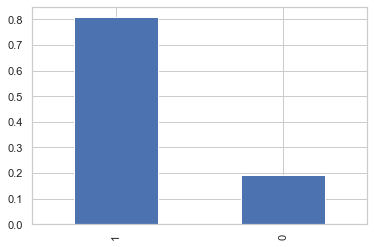

In [211]:
%matplotlib inline
(df_final_clas_limpia['Titular'].value_counts()/np.float(len(df_final_clas_limpia))).plot.bar()

In [212]:
# Vemos si existen valores nulos en el dataset

check_for_nan = df_final_clas_limpia.isnull().values.any()
print (check_for_nan)


False


In [213]:
# Calculamos el total de valores de nulos.

total_nan_values = df_final_clas_limpia.isnull().sum().sum()
print (total_nan_values)

0


In [214]:
# Luego, necesitamos transformar los registros con valores nulos debido a que converiremos nuestras variables en variables dummy,
# donde habrá 0 y 1 en función de si es titular o suplente (técnica de One Hot Encoding).

#Comenzamos con la preparacion de nuestros datos

df_final_dummy = pd.get_dummies(df_final_clas_limpia, drop_first=False)

In [215]:
df_final_dummy

,Titular,Experiencia_temporadas,Puntos,Asistencias,Rebotes,Posición_Center,Posición_Point Guard,Posición_Power Forward,Posición_Shooting Guard,Posición_Small Forward,Cluster_1,Cluster_2,Cluster_3
0,1,3,9.6,2.3,3.3,0,1,0,0,0,0,0,1
1,1,2,3.9,1.6,1.0,0,1,0,0,0,1,0,0
2,1,1,1.5,0.4,3.0,0,0,1,0,0,1,0,0
3,1,1,11.2,1.3,4.0,0,0,0,1,0,0,1,0
4,1,6,14.3,0.9,14.2,1,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,1,5,7.7,2.2,2.2,0,1,0,0,0,0,1,0
414,1,12,8.2,0.9,4.1,1,0,0,0,0,0,1,0
415,1,1,13.4,1.5,5.8,0,0,1,0,0,0,1,0
416,1,12,21.7,10.3,9.5,0,1,0,0,0,0,0,1


Una vez obtenido nuestro df, decidimos elegir como target el campo "Titular" (jugador titular o suplente).
Para comenzar con nuestro modelo de árbol, convertimos todas los campos categóricos del dataset en variables dummy para tener 
0 y 1. Nuestra varriable target "Titular" ya posee las categorías 1 (titular) y 0 (suplente), por lo que no fue necesaria convertirla en dummy.

### DT con balanceo de clases:

In [837]:
#Separamos en X e y
X = df_final_dummy.drop(["Titular"], axis=1)
y = df_final_dummy["Titular"]

In [838]:
#Separamos en train y test
from sklearn.model_selection import train_test_split #Importamos la libreria para separar en train y test
from sklearn.utils import compute_sample_weight

# Nos quedamos con 20% para test y 80% para train debido a que contamos con pocas observaciones

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42) 

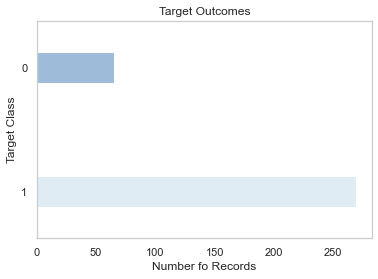

In [839]:
# Ploteamos la frecuencia de cada categoría de la variable target. Corroboramos presencia mayoritaria de la clase titular (1)

pd.Series(y_train).value_counts().plot.barh(grid=False, color=['#e0ecf4','#9ebcda','#8856a7'], width=0.25,edgecolor='w')
plt.title('Target Outcomes')
plt.ylabel('Target Class')
plt.xlabel('Number fo Records');

In [840]:
# Realizamos las ponderaciones sobre el set de training.

weights = compute_sample_weight(class_weight='balanced', y= y_train)
pd.Series(weights).head(10)

0    0.620818
1    0.620818
2    0.620818
3    0.620818
4    2.569231
5    0.620818
6    2.569231
7    0.620818
8    0.620818
9    0.620818
dtype: float64

In [841]:
#Importamos el modelo de Arbol de Decisión

from sklearn.tree import DecisionTreeClassifier

#Creamos un arbol de decisión y lo fiteamos. Incorporamos el parámetro sample_weight con los pesos de las clases balanceadas.
tree = DecisionTreeClassifier(random_state=42,max_depth=3)
tree.fit(X_train, y_train, sample_weight=weights)

DecisionTreeClassifier(max_depth=3, random_state=42)

In [842]:
X_test.head()

,Experiencia_temporadas,Puntos,Asistencias,Rebotes,Posición_Center,Posición_Point Guard,Posición_Power Forward,Posición_Shooting Guard,Posición_Small Forward,Cluster_1,Cluster_2,Cluster_3
321,2,13.8,3.1,2.3,0,0,0,1,0,0,1,0
324,1,10.3,1.4,3.3,0,0,1,0,0,0,1,0
388,1,2.6,0.4,1.3,0,1,0,0,0,1,0,0
56,2,13.1,5.2,2.7,0,1,0,0,0,0,1,0
153,9,21.1,6.3,3.5,0,1,0,0,0,0,0,1


In [843]:
y_train_pred = tree.predict(X_train) #Predicción en Train
y_train_pred

array([0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0,
       1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1,
       0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0,
       0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0,

In [844]:
y_test_pred = tree.predict(X_test) #Predicción en Test
y_test_pred

array([1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1,
       1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0,
       1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1], dtype=int64)

In [845]:
X_test['Prediccion_titular']=y_test_pred
X_test

,Experiencia_temporadas,Puntos,Asistencias,Rebotes,Posición_Center,Posición_Point Guard,Posición_Power Forward,Posición_Shooting Guard,Posición_Small Forward,Cluster_1,Cluster_2,Cluster_3,Prediccion_titular
321,2,13.8,3.1,2.3,0,0,0,1,0,0,1,0,1
324,1,10.3,1.4,3.3,0,0,1,0,0,0,1,0,1
388,1,2.6,0.4,1.3,0,1,0,0,0,1,0,0,0
56,2,13.1,5.2,2.7,0,1,0,0,0,0,1,0,1
153,9,21.1,6.3,3.5,0,1,0,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
57,10,20.4,4.2,5.6,0,0,1,0,0,0,0,1,1
126,11,10.6,1.4,1.8,0,1,0,0,0,0,1,0,0
24,6,12.8,5.4,2.8,0,1,0,0,0,0,0,1,1
17,8,19.6,3.7,3.0,0,0,0,1,0,0,0,1,1


In [846]:
from sklearn.metrics import accuracy_score

#Calculamos el accuracy en Train. 
train_accuracy = accuracy_score(y_train, y_train_pred)

#Calculamos el accuracy en Test. 
test_accuracy = accuracy_score(y_test, y_test_pred)

print('% de aciertos sobre el set de entrenamiento:', train_accuracy)
print('% de aciertos sobre el set de evaluación:',test_accuracy)

% de aciertos sobre el set de entrenamiento: 0.6646706586826348
% de aciertos sobre el set de evaluación: 0.6904761904761905


In [847]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_test_pred))

              precision    recall  f1-score   support

           0       0.34      0.80      0.48        15
           1       0.94      0.67      0.78        69

    accuracy                           0.69        84
   macro avg       0.64      0.73      0.63        84
weighted avg       0.83      0.69      0.73        84



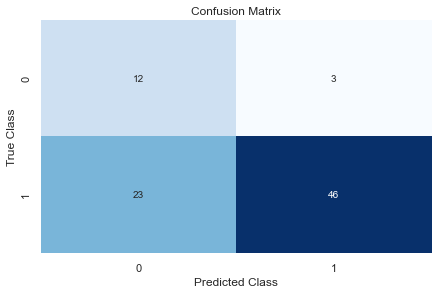

[[12  3]
 [23 46]]


In [848]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(y_test, y_test_pred)

# crear marco de datos de pandas Crear un conjunto de datos
dataframe = pd.DataFrame(cm)

# crear matriz de confusión
sns.heatmap(dataframe, annot=True, cbar=None, cmap="Blues")
plt.title("Confusion Matrix"), plt.tight_layout()
plt.ylabel("True Class"), plt.xlabel("Predicted Class")
plt.show()

print(cm)


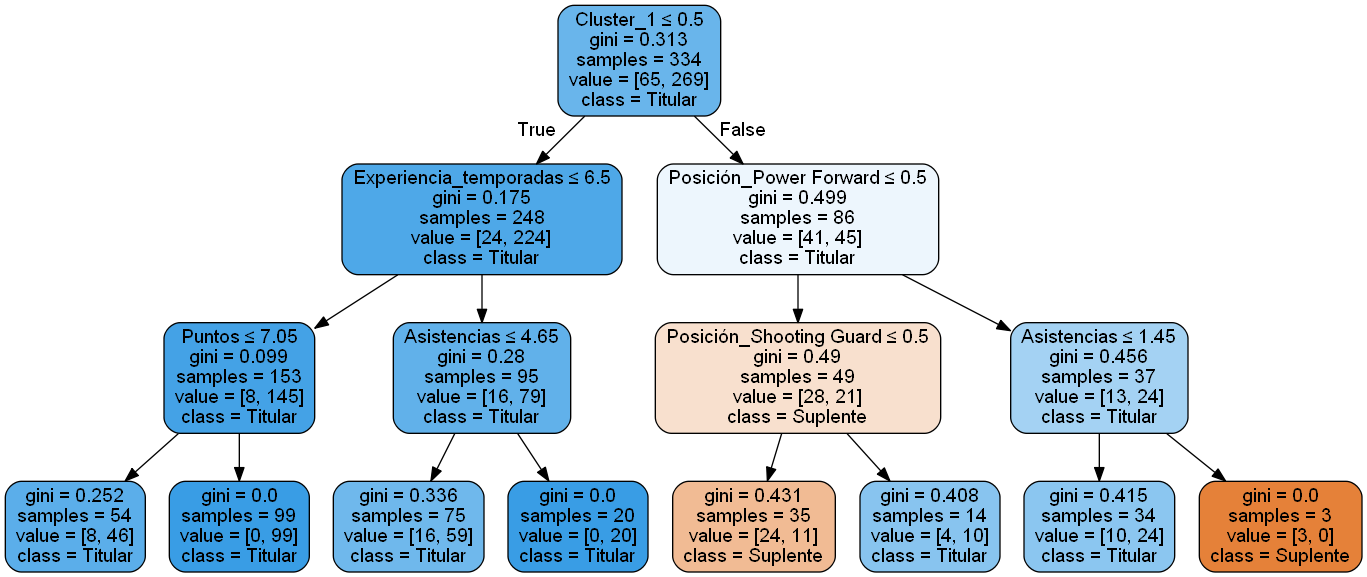

In [849]:
import pydotplus
from sklearn.tree import export_graphviz
from io import StringIO
from IPython.display import Image, SVG


tree_ = DecisionTreeClassifier(max_depth = 3)

# Train Decision Tree Classifer
tree_ = tree_.fit(X_train, y_train)
dot_data = StringIO()

export_graphviz(tree_, out_file=dot_data,  
                class_names=['Suplente', 'Titular'],  
                impurity='gini', proportion=False,
                filled=True, rounded=True,
                special_characters=True, 
                feature_names=X_train.columns)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

**Interpretación del árbol de decisión**:

Vemos la profundidad de tres niveles que establecimos originariamente.


La variable de Cluster_1 es el nodo raiz debido a que es la que mejor segmenta al inicio el conjunto de datos.
El conjunto de muestra verifica que tenemos 334 jugadores, de los cuales 65 fueron segmentados en suplentes y 269 en titulares. Nuestro objetivo es conocer la distribución o las condiciones por las cuales estos jugadores fueron clasificados como titulares o suplentes.

El nodo raiz infiere que pertener al cluster 1 (jugadores baratos/rookies) es la variable que mejor predice la condición de titular o suplente del jugador. Entendemos que si el jugador pertenece a cluster 1, tendrá mayores probabilidades de ser suplente, mientras que si no pertenece tiene altas probabilidad de ser titular.

Por otro lado, los jugadores que no pertenezcan al cluster 1 y que tengan más de 4.65 temporadas de experiencia tienen mayores probabilidades de ser titulares que los que tengan menos experiencia.
Asimismo, los jugadores que tengan 6.5 o menos temporadas de experiencia y un promedio mayor a 7.05 puntos en la temporada 2020-2021 tienen mayores probabilidades de ser titulares según los 99 casos de la muestra. 

Finalmente los jugadores que pertenezcan al cluster 1 y no sean escoltas (shotting guard) tienen probilidades de ser suplentes según los 24 casos de la muestra.

##### Este modelo nos arroja un accuracy bajo. La precisión es muy buena pero entendemos que las clases están desbalanceadas. Necesitamos seguir comparando con otros algoritmos y balancear las muestras con otras técnicas.

### DT con oversampled:

In [660]:
# Importamos el módulo resample para hacer un remuestreo que nos permita duplicar aleatoriamente la cantidad de observaciones
# de la clase minoritaria para lograr balancear la muestra. En este caso, haremos el sobremuestreo de la clase 0 (suplente)

from sklearn.utils import resample
df_majority = df_final_dummy[df_final_dummy["Titular"]== 1]
df_minority = df_final_dummy[df_final_dummy["Titular"]== 0]

In [661]:
# Oversampleamos la clase minoritaria

df_minority_oversampled = resample(df_minority, replace=True, n_samples= 338, random_state= 0)
df_minority_oversampled

,Titular,Experiencia_temporadas,Puntos,Asistencias,Rebotes,Posición_Center,Posición_Point Guard,Posición_Power Forward,Posición_Shooting Guard,Posición_Small Forward,Cluster_1,Cluster_2,Cluster_3
214,0,1,3.9,1.0,1.7,0,1,0,0,0,0,1,0
226,0,11,12.3,0.9,5.3,0,0,1,0,0,0,1,0
297,0,8,3.3,0.7,2.3,0,0,1,0,0,0,1,0
337,0,12,7.3,1.2,7.2,1,0,0,0,0,0,1,0
337,0,12,7.3,1.2,7.2,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
143,0,6,2.8,0.2,2.3,0,0,1,0,0,1,0,0
187,0,4,3.0,0.2,2.0,1,0,0,0,0,1,0,0
284,0,1,3.0,0.5,1.4,0,0,0,1,0,1,0,0
237,0,8,6.4,0.8,3.8,0,0,1,0,0,0,1,0


In [662]:
# Combinamos en un nuevo dataframe las observaciones de la clase mayoritaria con las nuevas observaciones de la clase 
# minoritaria resampleadas.

df_oversampled = pd.concat([df_majority, df_minority_oversampled])

In [663]:
# Hacemos el recuento de los valores de la nueva clase. Notamos que tenemos igual número de observaciones

df_oversampled['Titular'].value_counts()

0    338
1    338
Name: Titular, dtype: int64

In [664]:
#Separamos en X e y
X = df_oversampled.drop(["Titular"], axis=1)
y = df_oversampled["Titular"]

In [665]:
#Separamos en train y test
from sklearn.model_selection import train_test_split #Importamos la libreria para separar en train y test
from sklearn.utils import compute_sample_weight

# Nos quedamos con 20% para test y 80% para train debido a que contamos con pocas observaciones

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42) 

In [666]:
#Importamos el modelo de Arbol de Decisión

from sklearn.tree import DecisionTreeClassifier

#Creamos un arbol de decisión y lo fiteamos. Incorporamos el parámetro sample_weight con los pesos de las clases balanceadas.

tree = DecisionTreeClassifier(random_state=42,max_depth=3)
tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=42)

In [667]:
y_train_pred = tree.predict(X_train) #Predicción en Train
y_train_pred

array([0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0,
       1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0,
       0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,

In [668]:
y_test_pred = tree.predict(X_test) #Predicción en Test
y_test_pred

array([0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1], dtype=int64)

In [669]:
from sklearn.metrics import accuracy_score

#Calculamos el accuracy en Train. 
train_accuracy = accuracy_score(y_train, y_train_pred)

#Calculamos el accuracy en Test. 
test_accuracy = accuracy_score(y_test, y_test_pred)

print('% de aciertos sobre el set de entrenamiento:', train_accuracy)
print('% de aciertos sobre el set de evaluación:',test_accuracy)

% de aciertos sobre el set de entrenamiento: 0.7988165680473372
% de aciertos sobre el set de evaluación: 0.6804733727810651


In [670]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_test_pred))

              precision    recall  f1-score   support

           0       0.61      0.81      0.70        77
           1       0.78      0.58      0.66        92

    accuracy                           0.68       169
   macro avg       0.70      0.69      0.68       169
weighted avg       0.70      0.68      0.68       169



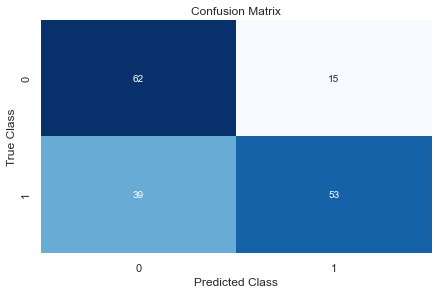

[[62 15]
 [39 53]]


In [671]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(y_test, y_test_pred)

# crear marco de datos de pandas Crear un conjunto de datos
dataframe = pd.DataFrame(cm)

# crear matriz de confusión
sns.heatmap(dataframe, annot=True, cbar=None, cmap="Blues")
plt.title("Confusion Matrix"), plt.tight_layout()
plt.ylabel("True Class"), plt.xlabel("Predicted Class")
plt.show()

print(cm)


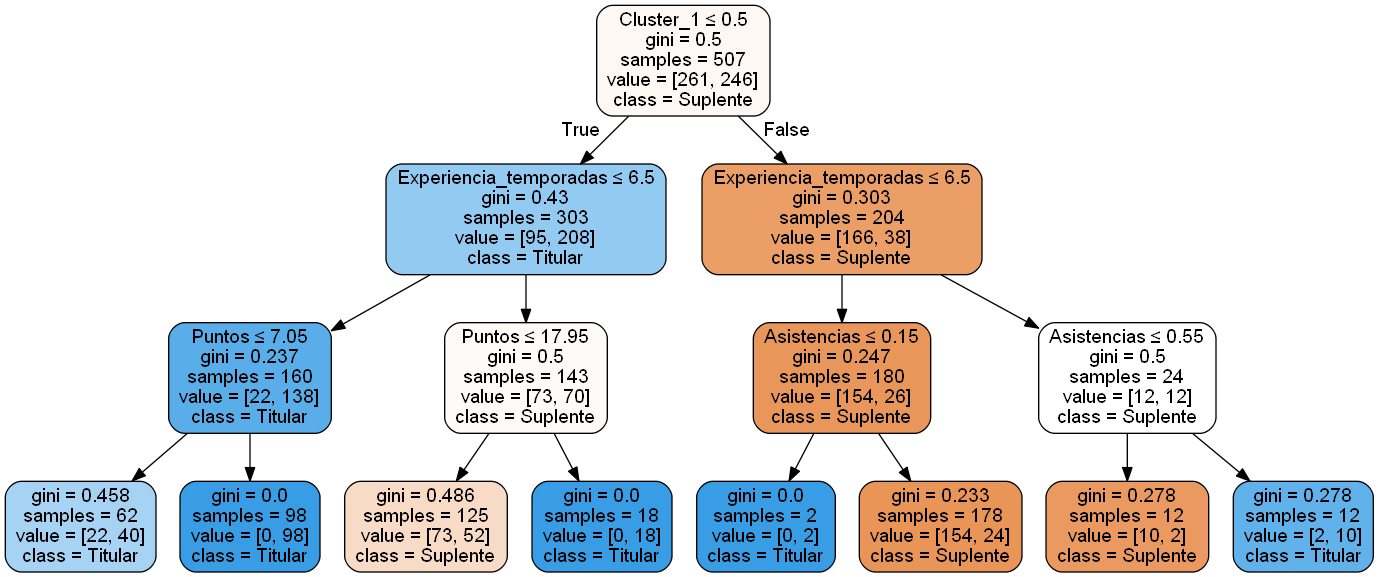

In [672]:
import pydotplus
from sklearn.tree import export_graphviz
from io import StringIO
from IPython.display import Image, SVG


tree_ = DecisionTreeClassifier(max_depth = 3)

# Train Decision Tree Classifer
tree_ = tree_.fit(X_train, y_train)
dot_data = StringIO()

export_graphviz(tree_, out_file=dot_data,  
                class_names=['Suplente', 'Titular'],  
                impurity='gini', proportion=False,
                filled=True, rounded=True,
                special_characters=True, 
                feature_names=X_train.columns)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

# 
# Modelo de Clasificación Supervizado - Random Forest (RF)

### RF con balanceo de clases:

In [242]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn import datasets
from sklearn.utils import compute_sample_weight

#Separamos en X e y
X = df_final_dummy.drop(["Titular"], axis=1)
y = df_final_dummy["Titular"]

#Separamos en train y test
from sklearn.model_selection import train_test_split #Importamos la libreria para separar en train y test

# Nos quedamos con 30% para test y 70% para train
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42) 

In [243]:
# Llamamos al modelo de random forest. Balanceamos la variable target.

RF = RandomForestClassifier(random_state=42, n_estimators=100, 
                               class_weight="balanced", max_features="log2") 
RF.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', max_features='log2',
                       random_state=42)

In [244]:
X_test.head()

,Experiencia_temporadas,Puntos,Asistencias,Rebotes,Posición_Center,Posición_Point Guard,Posición_Power Forward,Posición_Shooting Guard,Posición_Small Forward,Cluster_1,Cluster_2,Cluster_3
321,2,13.8,3.1,2.3,0,0,0,1,0,0,1,0
324,1,10.3,1.4,3.3,0,0,1,0,0,0,1,0
388,1,2.6,0.4,1.3,0,1,0,0,0,1,0,0
56,2,13.1,5.2,2.7,0,1,0,0,0,0,1,0
153,9,21.1,6.3,3.5,0,1,0,0,0,0,0,1


In [245]:
y_train_pred = RF.predict(X_train) #Prediccion en Train
y_test_pred = RF.predict(X_test) #Prediccion en Test


In [246]:
#Calculamos el accuracy en Train. 
train_accuracy = accuracy_score(y_train, y_train_pred)

#Calculamos el accuracy en Test. 
test_accuracy = accuracy_score(y_test, y_test_pred)

print('% de aciertos sobre el set de entrenamiento (accuracy):', train_accuracy)
print('% de aciertos sobre el set de evaluación (accuracy):',test_accuracy)

% de aciertos sobre el set de entrenamiento (accuracy): 0.9897260273972602
% de aciertos sobre el set de evaluación (accuracy): 0.8015873015873016


#### Calculamos la métrica Precisión

In [247]:
from sklearn.metrics import precision_score
precision_score(y_test, y_test_pred) 

0.8558558558558559

#### Calculamos la métrica Recall

In [248]:
from sklearn.metrics import recall_score
recall_score(y_test, y_test_pred) 

0.9134615384615384

#### classification_report

In [249]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_test_pred))

              precision    recall  f1-score   support

           0       0.40      0.27      0.32        22
           1       0.86      0.91      0.88       104

    accuracy                           0.80       126
   macro avg       0.63      0.59      0.60       126
weighted avg       0.78      0.80      0.79       126



#### Matriz de confusión

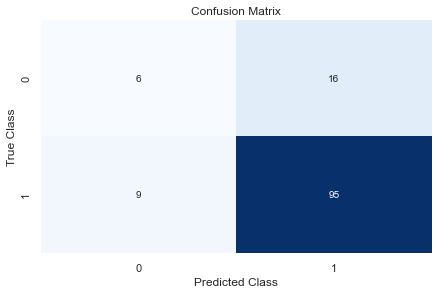

[[ 6 16]
 [ 9 95]]


In [250]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(y_test, y_test_pred)

# crear marco de datos de pandas Crear un conjunto de datos
dataframe = pd.DataFrame(cm)

# crear matriz de confusión
sns.heatmap(dataframe, annot=True, cbar=None, cmap="Blues")
plt.title("Confusion Matrix"), plt.tight_layout()
plt.ylabel("True Class"), plt.xlabel("Predicted Class")
plt.show()

print(cm)

#### Calculamos y ploteamos la Curva ROC

In [251]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

y_score1 = tree.predict_proba(X_test)[:,1]
y_score1

array([1.        , 1.        , 0.13483146, 1.        , 1.        ,
       0.13483146, 0.64516129, 0.13483146, 1.        , 1.        ,
       0.13483146, 1.        , 0.416     , 0.416     , 1.        ,
       1.        , 0.64516129, 0.83333333, 0.416     , 1.        ,
       0.13483146, 1.        , 1.        , 0.416     , 1.        ,
       1.        , 0.13483146, 1.        , 0.416     , 1.        ,
       0.416     , 0.416     , 0.416     , 0.13483146, 1.        ,
       0.416     , 1.        , 0.64516129, 0.64516129, 1.        ,
       1.        , 0.416     , 1.        , 1.        , 0.416     ,
       1.        , 1.        , 0.13483146, 0.416     , 0.416     ,
       1.        , 0.13483146, 0.416     , 1.        , 0.13483146,
       1.        , 0.416     , 1.        , 0.13483146, 1.        ,
       1.        , 0.416     , 1.        , 0.64516129, 1.        ,
       0.13483146, 1.        , 1.        , 0.64516129, 0.13483146,
       1.        , 0.64516129, 1.        , 0.416     , 0.13483

In [252]:
# Calculamos las tasas 
false_positive_rate1, true_positive_rate1, threshold1 = roc_curve(y_test, y_score1)

In [253]:
# Vemos que tenemos que nuestro modelo tiene un métrica de ROC del 87% 
print('roc_auc_score for DecisionTree: ', roc_auc_score(y_test, y_score1))

roc_auc_score for DecisionTree:  0.8734702797202796


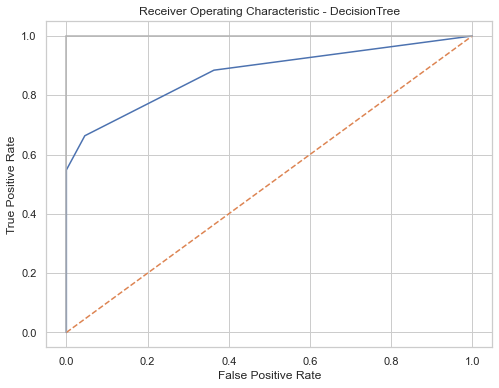

In [254]:
plt.subplots(1, figsize=(8,6))
plt.title('Receiver Operating Characteristic - DecisionTree')
plt.plot(false_positive_rate1, true_positive_rate1)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [255]:
# Según el resultado de la curva de ROC observamos que la métrica del 81% es aceptable. Mientras que si observamos las métricas
# de accuracy del set de entrenamiento y de test, interpretamos que tenemos resultados positivos.

### RF con oversampled:

In [256]:
# Importamos el módulo resample para hacer un remuestreo que nos permita duplicar aleatoriamente la cantidad de observaciones
# de la clase minoritaria para lograr balancear la muestra. En este caso, haremos el sobremuestreo de la clase 0 (suplente)

from sklearn.utils import resample
df_majority = df_final_dummy[df_final_dummy["Titular"]== 1]
df_minority = df_final_dummy[df_final_dummy["Titular"]== 0]

In [257]:
# Oversampleamos la clase minoritaria

df_minority_oversampled = resample(df_minority, replace=True, n_samples= 338, random_state= 0)
df_minority_oversampled

,Titular,Experiencia_temporadas,Puntos,Asistencias,Rebotes,Posición_Center,Posición_Point Guard,Posición_Power Forward,Posición_Shooting Guard,Posición_Small Forward,Cluster_1,Cluster_2,Cluster_3
214,0,1,3.9,1.0,1.7,0,1,0,0,0,0,1,0
226,0,11,12.3,0.9,5.3,0,0,1,0,0,0,1,0
297,0,8,3.3,0.7,2.3,0,0,1,0,0,0,1,0
337,0,12,7.3,1.2,7.2,1,0,0,0,0,0,1,0
337,0,12,7.3,1.2,7.2,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
143,0,6,2.8,0.2,2.3,0,0,1,0,0,1,0,0
187,0,4,3.0,0.2,2.0,1,0,0,0,0,1,0,0
284,0,1,3.0,0.5,1.4,0,0,0,1,0,1,0,0
237,0,8,6.4,0.8,3.8,0,0,1,0,0,0,1,0


In [258]:
# Combinamos en un nuevo dataframe las observaciones de la clase mayoritaria con las nuevas observaciones de la clase 
# minoritaria resampleadas.

df_oversampled = pd.concat([df_majority, df_minority_oversampled])

In [259]:
# Hacemos el recuento de los valores de la nueva clase. Notamos que tenemos igual número de observaciones

df_oversampled['Titular'].value_counts()

0    338
1    338
Name: Titular, dtype: int64

In [260]:
#Separamos en X e y
X = df_oversampled.drop(["Titular"], axis=1)
y = df_oversampled["Titular"]

In [261]:
#Separamos en train y test
from sklearn.model_selection import train_test_split #Importamos la libreria para separar en train y test

# Nos quedamos con 30% para test y 70% para train
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42) 

In [262]:
# Llamamos al modelo de random forest. Balanceamos la variable target.

RF = RandomForestClassifier(random_state=42, n_estimators=50) 
RF.fit(X_train, y_train)

RandomForestClassifier(n_estimators=50, random_state=42)

In [263]:
y_train_pred = RF.predict(X_train) #Prediccion en Train
y_test_pred = RF.predict(X_test) #Prediccion en Test


In [264]:
#Calculamos el accuracy en Train. 
train_accuracy = accuracy_score(y_train, y_train_pred)

#Calculamos el accuracy en Test.
test_accuracy = accuracy_score(y_test, y_test_pred)

print('% de aciertos sobre el set de entrenamiento (accuracy):', train_accuracy)
print('% de aciertos sobre el set de evaluación (accuracy):', test_accuracy)

% de aciertos sobre el set de entrenamiento (accuracy): 0.9957716701902748
% de aciertos sobre el set de evaluación (accuracy): 0.896551724137931


In [265]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_test_pred))

              precision    recall  f1-score   support

           0       0.82      1.00      0.90        93
           1       1.00      0.81      0.89       110

    accuracy                           0.90       203
   macro avg       0.91      0.90      0.90       203
weighted avg       0.92      0.90      0.90       203



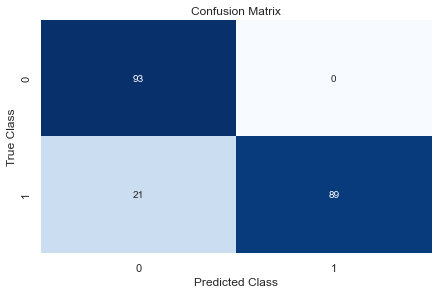

[[93  0]
 [21 89]]


In [266]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(y_test, y_test_pred)

# crear marco de datos de pandas Crear un conjunto de datos
dataframe = pd.DataFrame(cm)

# crear matriz de confusión
sns.heatmap(dataframe, annot=True, cbar=None, cmap="Blues")
plt.title("Confusion Matrix"), plt.tight_layout()
plt.ylabel("True Class"), plt.xlabel("Predicted Class")
plt.show()

print(cm)

In [267]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

y_score1 = tree.predict_proba(X_test)[:,1]
y_score1

array([0.416     , 0.416     , 0.13483146, 0.83333333, 0.416     ,
       1.        , 0.13483146, 1.        , 0.64516129, 0.13483146,
       0.416     , 0.13483146, 0.13483146, 1.        , 0.64516129,
       1.        , 0.64516129, 0.416     , 1.        , 0.64516129,
       0.13483146, 1.        , 0.416     , 0.416     , 1.        ,
       0.64516129, 0.13483146, 0.13483146, 0.416     , 0.64516129,
       0.13483146, 1.        , 0.416     , 0.64516129, 1.        ,
       0.416     , 0.416     , 0.416     , 0.13483146, 0.64516129,
       0.13483146, 0.416     , 0.13483146, 1.        , 0.64516129,
       0.416     , 1.        , 0.13483146, 0.64516129, 0.13483146,
       0.416     , 0.13483146, 0.64516129, 0.416     , 0.416     ,
       0.13483146, 0.13483146, 0.416     , 1.        , 0.13483146,
       0.416     , 0.16666667, 0.416     , 0.13483146, 1.        ,
       0.13483146, 0.416     , 0.13483146, 0.13483146, 1.        ,
       0.64516129, 1.        , 0.416     , 0.13483146, 1.     

In [268]:
# Calculamos las tasas 
false_positive_rate1, true_positive_rate1, threshold1 = roc_curve(y_test, y_score1)

In [269]:
# Vemos que tenemos que nuestro modelo tiene un métrica de ROC del 87% 
print('roc_auc_score for DecisionTree: ', roc_auc_score(y_test, y_score1))

roc_auc_score for DecisionTree:  0.7922287390029326


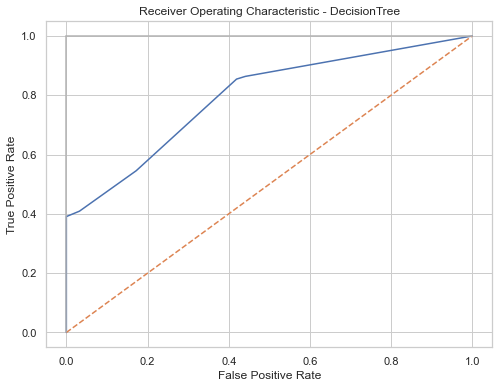

In [270]:
plt.subplots(1, figsize=(8,6))
plt.title('Receiver Operating Characteristic - DecisionTree')
plt.plot(false_positive_rate1, true_positive_rate1)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# Modelo de Clasificación Supervizado - Regresión Logística (LR)

### LR con balanceo de clases:

In [271]:
# Convertiremos las variables en dummys y nos quedaremos para nuestro modelo con la columna Titular

variables_rl= df_final_dummy
variables_rl


,Titular,Experiencia_temporadas,Puntos,Asistencias,Rebotes,Posición_Center,Posición_Point Guard,Posición_Power Forward,Posición_Shooting Guard,Posición_Small Forward,Cluster_1,Cluster_2,Cluster_3
0,1,3,9.6,2.3,3.3,0,1,0,0,0,0,0,1
1,1,2,3.9,1.6,1.0,0,1,0,0,0,1,0,0
2,1,1,1.5,0.4,3.0,0,0,1,0,0,1,0,0
3,1,1,11.2,1.3,4.0,0,0,0,1,0,0,1,0
4,1,6,14.3,0.9,14.2,1,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,1,5,7.7,2.2,2.2,0,1,0,0,0,0,1,0
414,1,12,8.2,0.9,4.1,1,0,0,0,0,0,1,0
415,1,1,13.4,1.5,5.8,0,0,1,0,0,0,1,0
416,1,12,21.7,10.3,9.5,0,1,0,0,0,0,0,1


In [272]:
# Calculamos el número de posibles valores NaN para nuestro dataframe
total_nan_values = variables_rl.isnull().sum().sum()
print (total_nan_values)

0


In [273]:
# Eliminamos las observaciones con valores NaN del dataframe debido a que necesitamos contar con la información de los puntos
# y los partidos ganados o perdidos
Game_pts_wl = variables_rl.dropna()
total_nan_values = variables_rl.isnull().sum().sum()
print (total_nan_values)

0


In [274]:
# Empezamos a armar nuestro modelo separando X e y
df_final_x= variables_rl.drop(["Titular"], axis=1)
df_final_x

,Experiencia_temporadas,Puntos,Asistencias,Rebotes,Posición_Center,Posición_Point Guard,Posición_Power Forward,Posición_Shooting Guard,Posición_Small Forward,Cluster_1,Cluster_2,Cluster_3
0,3,9.6,2.3,3.3,0,1,0,0,0,0,0,1
1,2,3.9,1.6,1.0,0,1,0,0,0,1,0,0
2,1,1.5,0.4,3.0,0,0,1,0,0,1,0,0
3,1,11.2,1.3,4.0,0,0,0,1,0,0,1,0
4,6,14.3,0.9,14.2,1,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
413,5,7.7,2.2,2.2,0,1,0,0,0,0,1,0
414,12,8.2,0.9,4.1,1,0,0,0,0,0,1,0
415,1,13.4,1.5,5.8,0,0,1,0,0,0,1,0
416,12,21.7,10.3,9.5,0,1,0,0,0,0,0,1


In [275]:
total_nan_values = df_final_x.isnull().sum().sum()
print (total_nan_values)

0


In [276]:
# Nos quedamos con un array de X para nuestro modelo
X=df_final_x.to_numpy()
X

array([[ 3. ,  9.6,  2.3, ...,  0. ,  0. ,  1. ],
       [ 2. ,  3.9,  1.6, ...,  1. ,  0. ,  0. ],
       [ 1. ,  1.5,  0.4, ...,  1. ,  0. ,  0. ],
       ...,
       [ 1. , 13.4,  1.5, ...,  0. ,  1. ,  0. ],
       [12. , 21.7, 10.3, ...,  0. ,  0. ,  1. ],
       [ 3. , 14.3,  1.5, ...,  0. ,  0. ,  1. ]])

In [277]:
# Nos quedamos con y
df_final_y=variables_rl[['Titular']]

In [278]:
df_final_y


,Titular
0,1
1,1
2,1
3,1
4,1
...,...
413,1
414,1
415,1
416,1


In [279]:
# Vemos cuáles son los valores de nuestra variable y
np.unique(df_final_y)

array([0, 1], dtype=int64)

In [280]:
print(df_final_y.value_counts())

Titular
1          338
0           80
dtype: int64


In [281]:
# Nos quedamos con un array de y para nuestro modelo

y= df_final_y.to_numpy()
y

array([[1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
    

In [282]:
total_nan_values = df_final_y.isnull().sum().sum()
print (total_nan_values)

0


In [283]:
weights = compute_sample_weight(class_weight='balanced', y= y)

In [284]:
#Entrenamos un modelo de regresión logística
#Importamos la clase LogisticRegresion de scikit-learn
from sklearn.linear_model import LogisticRegression

# Creamos una instancia de la Regresión Logística
regresion_logistica = LogisticRegression()

# Entrenamos la regresión logística con los datos de entrenamiento
regresion_logistica.fit(X,y,sample_weight=weights)

LogisticRegression()

In [285]:
y_train_pred = regresion_logistica.predict(X_train) #Prediccion en Train
y_test_pred = regresion_logistica.predict(X_test) #Prediccion en Test

In [286]:
#Calculamos el accuracy en Train. 
train_accuracy = accuracy_score(y_train, y_train_pred)

#Calculamos el accuracy en Test. 
test_accuracy = accuracy_score(y_test, y_test_pred)

print('% de aciertos sobre el set de entrenamiento (accuracy):', train_accuracy)
print('% de aciertos sobre el set de evaluación (accuracy):', test_accuracy)

% de aciertos sobre el set de entrenamiento (accuracy): 0.7991543340380549
% de aciertos sobre el set de evaluación (accuracy): 0.7586206896551724


In [287]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_test_pred))

              precision    recall  f1-score   support

           0       0.70      0.83      0.76        93
           1       0.83      0.70      0.76       110

    accuracy                           0.76       203
   macro avg       0.76      0.76      0.76       203
weighted avg       0.77      0.76      0.76       203



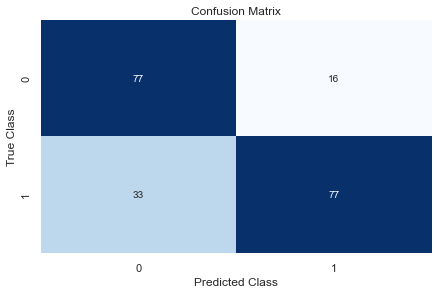

[[77 16]
 [33 77]]


In [288]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(y_test, y_test_pred)

# crear marco de datos de pandas Crear un conjunto de datos
dataframe = pd.DataFrame(cm)

# crear matriz de confusión
sns.heatmap(dataframe, annot=True, cbar=None, cmap="Blues")
plt.title("Confusion Matrix"), plt.tight_layout()
plt.ylabel("True Class"), plt.xlabel("Predicted Class")
plt.show()

print(cm)

### LR con oversampled:

In [289]:
# Convertiremos las variables en dummys y nos quedaremos para nuestro modelo con la columna Titular

variables_rl= df_final_dummy
variables_rl

,Titular,Experiencia_temporadas,Puntos,Asistencias,Rebotes,Posición_Center,Posición_Point Guard,Posición_Power Forward,Posición_Shooting Guard,Posición_Small Forward,Cluster_1,Cluster_2,Cluster_3
0,1,3,9.6,2.3,3.3,0,1,0,0,0,0,0,1
1,1,2,3.9,1.6,1.0,0,1,0,0,0,1,0,0
2,1,1,1.5,0.4,3.0,0,0,1,0,0,1,0,0
3,1,1,11.2,1.3,4.0,0,0,0,1,0,0,1,0
4,1,6,14.3,0.9,14.2,1,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,1,5,7.7,2.2,2.2,0,1,0,0,0,0,1,0
414,1,12,8.2,0.9,4.1,1,0,0,0,0,0,1,0
415,1,1,13.4,1.5,5.8,0,0,1,0,0,0,1,0
416,1,12,21.7,10.3,9.5,0,1,0,0,0,0,0,1


In [290]:
# Importamos el módulo resample para hacer un remuestreo que nos permita duplicar aleatoriamente la cantidad de observaciones
# de la clase minoritaria para lograr balancear la muestra. En este caso, haremos el sobremuestreo de la clase 0 (suplente)

from sklearn.utils import resample
df_majority = df_final_dummy[df_final_dummy["Titular"]== 1]
df_minority = df_final_dummy[df_final_dummy["Titular"]== 0]

In [291]:
# Oversampleamos la clase minoritaria

df_minority_oversampled = resample(df_minority, replace=True, n_samples= 338, random_state= 0)
df_minority_oversampled

,Titular,Experiencia_temporadas,Puntos,Asistencias,Rebotes,Posición_Center,Posición_Point Guard,Posición_Power Forward,Posición_Shooting Guard,Posición_Small Forward,Cluster_1,Cluster_2,Cluster_3
214,0,1,3.9,1.0,1.7,0,1,0,0,0,0,1,0
226,0,11,12.3,0.9,5.3,0,0,1,0,0,0,1,0
297,0,8,3.3,0.7,2.3,0,0,1,0,0,0,1,0
337,0,12,7.3,1.2,7.2,1,0,0,0,0,0,1,0
337,0,12,7.3,1.2,7.2,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
143,0,6,2.8,0.2,2.3,0,0,1,0,0,1,0,0
187,0,4,3.0,0.2,2.0,1,0,0,0,0,1,0,0
284,0,1,3.0,0.5,1.4,0,0,0,1,0,1,0,0
237,0,8,6.4,0.8,3.8,0,0,1,0,0,0,1,0


In [292]:
# Combinamos en un nuevo dataframe las observaciones de la clase mayoritaria con las nuevas observaciones de la clase 
# minoritaria resampleadas.

df_oversampled = pd.concat([df_majority, df_minority_oversampled])

In [293]:
# Hacemos el recuento de los valores de la nueva clase. Notamos que tenemos igual número de observaciones

df_oversampled['Titular'].value_counts()

0    338
1    338
Name: Titular, dtype: int64

In [294]:
#Separamos en X e y
df_final_x = df_oversampled.drop(["Titular"], axis=1)


In [295]:
df_final_x

,Experiencia_temporadas,Puntos,Asistencias,Rebotes,Posición_Center,Posición_Point Guard,Posición_Power Forward,Posición_Shooting Guard,Posición_Small Forward,Cluster_1,Cluster_2,Cluster_3
0,3,9.6,2.3,3.3,0,1,0,0,0,0,0,1
1,2,3.9,1.6,1.0,0,1,0,0,0,1,0,0
2,1,1.5,0.4,3.0,0,0,1,0,0,1,0,0
3,1,11.2,1.3,4.0,0,0,0,1,0,0,1,0
4,6,14.3,0.9,14.2,1,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
143,6,2.8,0.2,2.3,0,0,1,0,0,1,0,0
187,4,3.0,0.2,2.0,1,0,0,0,0,1,0,0
284,1,3.0,0.5,1.4,0,0,0,1,0,1,0,0
237,8,6.4,0.8,3.8,0,0,1,0,0,0,1,0


In [296]:
# Nos quedamos con un array de X para nuestro modelo
X=df_final_x.to_numpy()
X

array([[3. , 9.6, 2.3, ..., 0. , 0. , 1. ],
       [2. , 3.9, 1.6, ..., 1. , 0. , 0. ],
       [1. , 1.5, 0.4, ..., 1. , 0. , 0. ],
       ...,
       [1. , 3. , 0.5, ..., 1. , 0. , 0. ],
       [8. , 6.4, 0.8, ..., 0. , 1. , 0. ],
       [1. , 5. , 0.7, ..., 1. , 0. , 0. ]])

In [297]:
# Nos quedamos con y
df_final_y = df_oversampled[["Titular"]]
df_final_y

,Titular
0,1
1,1
2,1
3,1
4,1
...,...
143,0
187,0
284,0
237,0


In [298]:
# Nos quedamos con un array de y para nuestro modelo
y= df_final_y.to_numpy()
y

array([[1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
    

In [299]:
#Entrenamos un modelo de regresión logística
#Importamos la clase LogisticRegresion de scikit-learn
from sklearn.linear_model import LogisticRegression

# Creamos una instancia de la Regresión Logística
regresion_logistica = LogisticRegression()

# Entrenamos la regresión logística con los datos de entrenamiento
regresion_logistica.fit(X,y)

LogisticRegression()

In [300]:
y_train_pred = regresion_logistica.predict(X_train) #Prediccion en Train
y_test_pred = regresion_logistica.predict(X_test) #Prediccion en Test

In [301]:
#Calculamos el accuracy en Train. 
train_accuracy = accuracy_score(y_train, y_train_pred)

#Calculamos el accuracy en Test. 
test_accuracy = accuracy_score(y_test, y_test_pred)

print('% de aciertos sobre el set de entrenamiento (accuracy):', train_accuracy)
print('% de aciertos sobre el set de evaluación (accuracy):', test_accuracy)

% de aciertos sobre el set de entrenamiento (accuracy): 0.7801268498942917
% de aciertos sobre el set de evaluación (accuracy): 0.7389162561576355


In [302]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_test_pred))

              precision    recall  f1-score   support

           0       0.70      0.76      0.73        93
           1       0.78      0.72      0.75       110

    accuracy                           0.74       203
   macro avg       0.74      0.74      0.74       203
weighted avg       0.74      0.74      0.74       203



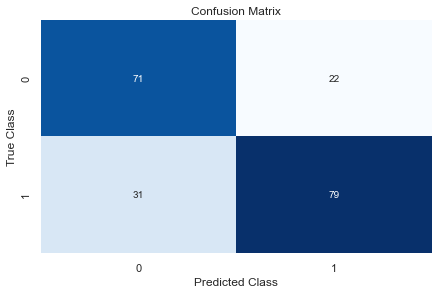

[[71 22]
 [31 79]]


In [303]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(y_test, y_test_pred)

# crear marco de datos de pandas Crear un conjunto de datos
dataframe = pd.DataFrame(cm)

# crear matriz de confusión
sns.heatmap(dataframe, annot=True, cbar=None, cmap="Blues")
plt.title("Confusion Matrix"), plt.tight_layout()
plt.ylabel("True Class"), plt.xlabel("Predicted Class")
plt.show()

print(cm)


# Técnicas de Hyperparameter Tuning  - Randomized Search CV 

### Random Search aplicado a KNN

In [323]:
import scipy as sp
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import RandomizedSearchCV

#Creamos nuestro objeto KNN
knn = KNeighborsClassifier()

In [324]:
# Convertiremos las variables en dummys y nos quedaremos para nuestro modelo con la columna Titular.


variables_knn= df_final_dummy
variables_knn

,Titular,Experiencia_temporadas,Puntos,Asistencias,Rebotes,Posición_Center,Posición_Point Guard,Posición_Power Forward,Posición_Shooting Guard,Posición_Small Forward,Cluster_1,Cluster_2,Cluster_3
0,1,3,9.6,2.3,3.3,0,1,0,0,0,0,0,1
1,1,2,3.9,1.6,1.0,0,1,0,0,0,1,0,0
2,1,1,1.5,0.4,3.0,0,0,1,0,0,1,0,0
3,1,1,11.2,1.3,4.0,0,0,0,1,0,0,1,0
4,1,6,14.3,0.9,14.2,1,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,1,5,7.7,2.2,2.2,0,1,0,0,0,0,1,0
414,1,12,8.2,0.9,4.1,1,0,0,0,0,0,1,0
415,1,1,13.4,1.5,5.8,0,0,1,0,0,0,1,0
416,1,12,21.7,10.3,9.5,0,1,0,0,0,0,0,1


In [325]:
# Empezamos a armar nuestro modelo separando X e y
X= variables_knn.drop(["Titular"], axis=1)
X

,Experiencia_temporadas,Puntos,Asistencias,Rebotes,Posición_Center,Posición_Point Guard,Posición_Power Forward,Posición_Shooting Guard,Posición_Small Forward,Cluster_1,Cluster_2,Cluster_3
0,3,9.6,2.3,3.3,0,1,0,0,0,0,0,1
1,2,3.9,1.6,1.0,0,1,0,0,0,1,0,0
2,1,1.5,0.4,3.0,0,0,1,0,0,1,0,0
3,1,11.2,1.3,4.0,0,0,0,1,0,0,1,0
4,6,14.3,0.9,14.2,1,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
413,5,7.7,2.2,2.2,0,1,0,0,0,0,1,0
414,12,8.2,0.9,4.1,1,0,0,0,0,0,1,0
415,1,13.4,1.5,5.8,0,0,1,0,0,0,1,0
416,12,21.7,10.3,9.5,0,1,0,0,0,0,0,1


In [326]:
# Nos quedamos con y
y=variables_knn[['Titular']]
y

,Titular
0,1
1,1
2,1
3,1
4,1
...,...
413,1
414,1
415,1
416,1


In [327]:
# Calculamos la distribución de titulares y suplentes del dataset

print(df_final_y.value_counts())

Titular
0          338
1          338
dtype: int64


In [328]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state=42)

In [329]:
# Grilla para Random Search
param_dist = {'n_neighbors':sp.stats.randint(1, 10),
              'weights': ['uniform', 'distance'], 
              'leaf_size':sp.stats.randint(1, 10),
              'algorithm':['auto', 'kd_tree']}

#Aplicamos la grilla al modelo
model = RandomizedSearchCV(knn, param_dist,n_iter=100, random_state=42, cv=5)

In [330]:
#Entrenamos KNN con la grilla definida arriba y CV con tamaño de Fold=5
model.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=KNeighborsClassifier(), n_iter=100,
                   param_distributions={'algorithm': ['auto', 'kd_tree'],
                                        'leaf_size': <scipy.stats._distn_infrastructure.rv_frozen object at 0x00000219B6885E50>,
                                        'n_neighbors': <scipy.stats._distn_infrastructure.rv_frozen object at 0x00000219B82039A0>,
                                        'weights': ['uniform', 'distance']},
                   random_state=42)

In [331]:
print("Mejores parametros: "+str(model.best_params_))
print("Mejor Score: "+str(model.best_score_)+'\n')

Mejores parametros: {'algorithm': 'auto', 'leaf_size': 7, 'n_neighbors': 5, 'weights': 'uniform'}
Mejor Score: 0.7944476914085331



In [332]:
#Analizamos qué obtuvimos
scores = pd.DataFrame(model.cv_results_)
scores

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_algorithm,param_leaf_size,param_n_neighbors,param_weights,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.002801,0.000749,0.003001,2.780415e-07,auto,4,8,uniform,"{'algorithm': 'auto', 'leaf_size': 4, 'n_neigh...",0.796610,0.779661,0.758621,0.724138,0.793103,0.770427,0.026710,43
1,0.002601,0.000490,0.002800,4.003049e-04,auto,7,3,uniform,"{'algorithm': 'auto', 'leaf_size': 7, 'n_neigh...",0.762712,0.711864,0.741379,0.775862,0.706897,0.739743,0.027170,58
2,0.002801,0.000400,0.001600,4.899987e-04,auto,8,5,distance,"{'algorithm': 'auto', 'leaf_size': 8, 'n_neigh...",0.813559,0.779661,0.793103,0.741379,0.775862,0.780713,0.023682,5
3,0.002600,0.000490,0.001401,4.899403e-04,kd_tree,8,3,distance,"{'algorithm': 'kd_tree', 'leaf_size': 8, 'n_ne...",0.745763,0.711864,0.758621,0.741379,0.689655,0.729456,0.025109,67
4,0.002601,0.000490,0.001800,4.001618e-04,auto,2,8,distance,"{'algorithm': 'auto', 'leaf_size': 2, 'n_neigh...",0.779661,0.762712,0.758621,0.741379,0.793103,0.767095,0.017814,48
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0.002201,0.000400,0.001800,3.999710e-04,auto,6,7,distance,"{'algorithm': 'auto', 'leaf_size': 6, 'n_neigh...",0.796610,0.779661,0.775862,0.724138,0.793103,0.773875,0.026068,27
96,0.002600,0.000490,0.001400,4.901156e-04,auto,2,1,distance,"{'algorithm': 'auto', 'leaf_size': 2, 'n_neigh...",0.711864,0.728814,0.793103,0.741379,0.637931,0.722618,0.050291,76
97,0.002400,0.000490,0.001600,4.899987e-04,auto,9,6,distance,"{'algorithm': 'auto', 'leaf_size': 9, 'n_neigh...",0.796610,0.779661,0.775862,0.758621,0.775862,0.777323,0.012096,14
98,0.002401,0.000490,0.001800,4.001379e-04,auto,7,3,distance,"{'algorithm': 'auto', 'leaf_size': 7, 'n_neigh...",0.745763,0.711864,0.741379,0.741379,0.689655,0.726008,0.021837,69


In [333]:
#Prediccion
prediction = model.predict(X_test)

In [334]:
#Accuracy
print('Exactitud:', accuracy_score(y_test, prediction))

Exactitud: 0.8095238095238095


In [335]:
from sklearn.metrics import classification_report
print(classification_report(y_test,prediction))

              precision    recall  f1-score   support

           0       0.38      0.14      0.20        22
           1       0.84      0.95      0.89       104

    accuracy                           0.81       126
   macro avg       0.61      0.54      0.55       126
weighted avg       0.76      0.81      0.77       126



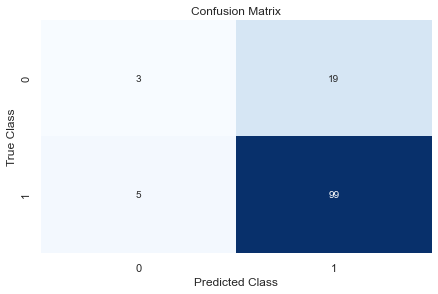

[[ 3 19]
 [ 5 99]]


In [336]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(y_test, prediction)

# crear marco de datos de pandas Crear un conjunto de datos
dataframe = pd.DataFrame(cm)

# crear matriz de confusión
sns.heatmap(dataframe, annot=True, cbar=None, cmap="Blues")
plt.title("Confusion Matrix"), plt.tight_layout()
plt.ylabel("True Class"), plt.xlabel("Predicted Class")
plt.show()

print(cm)

# Modelo de Clasificación Supervizado - Stratified K-Fold (SKF)

In [562]:
# Llamamos al dataframe con las variables seleccionadas para aplicar la técnica de label encoder

df_final_clas_limpia

,Titular,Experiencia_temporadas,Posición,Puntos,Asistencias,Rebotes,Cluster
0,1,3,1,9.6,2.3,3.3,2
1,1,2,1,3.9,1.6,1.0,0
2,1,1,2,1.5,0.4,3.0,0
3,1,1,3,11.2,1.3,4.0,1
4,1,6,0,14.3,0.9,14.2,2
...,...,...,...,...,...,...,...
413,1,5,1,7.7,2.2,2.2,1
414,1,12,0,8.2,0.9,4.1,1
415,1,1,2,13.4,1.5,5.8,1
416,1,12,1,21.7,10.3,9.5,2


In [563]:
#Separacion en X e y.
y = df_final_clas_limpia['Titular'].to_numpy()

for n in df_final_clas_limpia.columns:
  if str(df_final_clas_limpia[n].dtype) == 'object' or str(df_final_clas_limpia[n].dtype) == 'category':
    df_final_clas_limpia[n] = df_final_clas_limpia[n].astype('category').cat.codes
X = df_final_clas_limpia.drop(['Titular'], axis=1).to_numpy()
df_final_clas_limpia.head()

,Titular,Experiencia_temporadas,Posición,Puntos,Asistencias,Rebotes,Cluster
0,1,3,1,9.6,2.3,3.3,2
1,1,2,1,3.9,1.6,1.0,0
2,1,1,2,1.5,0.4,3.0,0
3,1,1,3,11.2,1.3,4.0,1
4,1,6,0,14.3,0.9,14.2,2


In [564]:
#StratifiedKFold - Train y Test
from sklearn.model_selection import StratifiedKFold

skf_ = StratifiedKFold(n_splits=5, random_state=42, shuffle=True) 
train, test = list(skf_.split(X, y))[0] #creo lista con índices de test y train que luego van a ser usados por el método kfods.
train

array([  0,   1,   2,   3,   4,   5,   7,   8,   9,  11,  12,  13,  15,
        16,  17,  18,  19,  20,  23,  24,  25,  26,  27,  28,  30,  31,
        33,  34,  36,  37,  38,  39,  41,  42,  43,  44,  45,  46,  47,
        48,  49,  50,  52,  53,  54,  55,  56,  58,  60,  61,  62,  63,
        64,  65,  66,  67,  68,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  81,  83,  84,  85,  86,  87,  88,  89,  90,  91,  92,  93,
        95,  96,  98,  99, 100, 103, 104, 105, 106, 107, 108, 109, 110,
       111, 113, 114, 115, 117, 119, 121, 122, 123, 124, 125, 126, 127,
       128, 130, 133, 134, 135, 138, 139, 140, 141, 143, 144, 145, 147,
       148, 149, 150, 151, 154, 155, 156, 157, 158, 159, 160, 161, 162,
       163, 164, 165, 166, 167, 168, 169, 170, 172, 174, 176, 177, 178,
       179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191,
       193, 194, 195, 196, 198, 199, 200, 202, 203, 204, 205, 206, 207,
       208, 209, 210, 211, 212, 213, 214, 215, 216, 218, 219, 22

In [565]:
X_train = X[train]
X_test = X[test]
y_train = y[train]
y_test= y[test]

In [566]:
#Entrenar arbol y encontrar el mejor alpha con GridSearchCV y StratifiedKFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

model = DecisionTreeClassifier()
par_ = list(np.arange(0.0, 1., step=0.05))
cv_ = StratifiedKFold(n_splits=5, random_state=0, shuffle=True)
tunner_ = GridSearchCV(estimator=model, param_grid={'ccp_alpha':par_}, cv=cv_)
skl=tunner_.fit(X_train, y_train)

In [567]:
# Tenemos una excelente métrica de accuracy para el caso de train y test.

print('Train score StratifiedKFold: ' + str(tunner_.score(X_train, y_train)))
print('Test score StratifiedKFold: ' + str(tunner_.score(X_test, y_test)))

Train score StratifiedKFold: 0.8083832335329342
Test score StratifiedKFold: 0.8095238095238095


In [568]:
y_train_pred = skl.predict(X_train) #Prediccion en Train
y_test_pred = skl.predict(X_test) #Prediccion en Test

In [569]:
# Otro método de calcular el accuracy.

from sklearn.metrics import accuracy_score

#Calculo el accuracy en Train
train_accuracy = accuracy_score(y_train, y_train_pred)

#Calculo el accuracy en Test
test_accuracy = accuracy_score(y_test, y_test_pred)

print('% de aciertos sobre el set de entrenamiento:', train_accuracy)
print('% de aciertos sobre el set de evaluación:',test_accuracy)

% de aciertos sobre el set de entrenamiento: 0.8083832335329342
% de aciertos sobre el set de evaluación: 0.8095238095238095


In [345]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_test_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        16
           1       0.81      1.00      0.89        68

    accuracy                           0.81        84
   macro avg       0.40      0.50      0.45        84
weighted avg       0.66      0.81      0.72        84



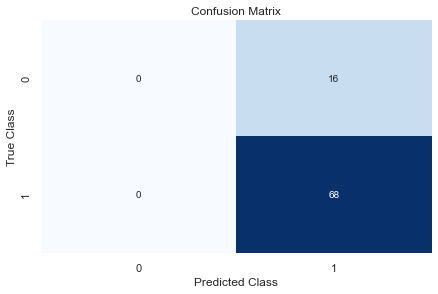

[[ 0 16]
 [ 0 68]]


In [346]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(y_test, y_test_pred)

# crear marco de datos de pandas Crear un conjunto de datos
dataframe = pd.DataFrame(cm)

# crear matriz de confusión
sns.heatmap(dataframe, annot=True, cbar=None, cmap="Blues")
plt.title("Confusion Matrix"), plt.tight_layout()
plt.ylabel("True Class"), plt.xlabel("Predicted Class")
plt.show()

print(cm)

# Modelo de Clasificación Supervizado - XGBOOST (XGB)

### XGB logistic Regression

In [347]:
# Predicción más robusta al reducir el error al ponderarse los errores (bias) ya que es un algoritmo que implementa modelos de
# manera secuencial y no entrenan en paralelo de manera independiente. Por lo que trata que el accuracy sea alto para que 
# disminuir los errores de clasificación.

In [375]:
#!pip install xgboost
import xgboost as xgb
from xgboost import XGBClassifier

In [376]:
# Convertiremos las variables en dummys y nos quedaremos para nuestro modelo con la columna Titular

variables_xgb= df_final_dummy
variables_xgb

,Titular,Experiencia_temporadas,Puntos,Asistencias,Rebotes,Posición_Center,Posición_Point Guard,Posición_Power Forward,Posición_Shooting Guard,Posición_Small Forward,Cluster_1,Cluster_2,Cluster_3
0,1,3,9.6,2.3,3.3,0,1,0,0,0,0,0,1
1,1,2,3.9,1.6,1.0,0,1,0,0,0,1,0,0
2,1,1,1.5,0.4,3.0,0,0,1,0,0,1,0,0
3,1,1,11.2,1.3,4.0,0,0,0,1,0,0,1,0
4,1,6,14.3,0.9,14.2,1,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,1,5,7.7,2.2,2.2,0,1,0,0,0,0,1,0
414,1,12,8.2,0.9,4.1,1,0,0,0,0,0,1,0
415,1,1,13.4,1.5,5.8,0,0,1,0,0,0,1,0
416,1,12,21.7,10.3,9.5,0,1,0,0,0,0,0,1


In [377]:
# Empezamos a armar nuestro modelo separando X e y
X= variables_xgb.drop(["Titular"], axis=1)
X

,Experiencia_temporadas,Puntos,Asistencias,Rebotes,Posición_Center,Posición_Point Guard,Posición_Power Forward,Posición_Shooting Guard,Posición_Small Forward,Cluster_1,Cluster_2,Cluster_3
0,3,9.6,2.3,3.3,0,1,0,0,0,0,0,1
1,2,3.9,1.6,1.0,0,1,0,0,0,1,0,0
2,1,1.5,0.4,3.0,0,0,1,0,0,1,0,0
3,1,11.2,1.3,4.0,0,0,0,1,0,0,1,0
4,6,14.3,0.9,14.2,1,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
413,5,7.7,2.2,2.2,0,1,0,0,0,0,1,0
414,12,8.2,0.9,4.1,1,0,0,0,0,0,1,0
415,1,13.4,1.5,5.8,0,0,1,0,0,0,1,0
416,12,21.7,10.3,9.5,0,1,0,0,0,0,0,1


In [378]:
total_nan_values = df_final_x.isnull().sum().sum()
print (total_nan_values)

0


In [379]:
# Nos quedamos con y
y=variables_xgb[['Titular']]
y

,Titular
0,1
1,1
2,1
3,1
4,1
...,...
413,1
414,1
415,1
416,1


In [380]:
total_nan_values = df_final_y.isnull().sum().sum()
print (total_nan_values)

0


In [381]:
# Calculamos la distribución de titulares y suplentes del dataset

print(df_final_y.value_counts())

Titular
0          338
1          338
dtype: int64


In [382]:
X = df_final_dummy
y = df_final_dummy.Titular

In [383]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state=42)

In [384]:
clf_xgb = xgb.XGBClassifier(objective='binary:logistic', n_estimators=70,seed=42,max_depth=3, learning_rate=0.01)

In [385]:
clf_xgb.fit(X_train,y_train) #Entrenamos el modelo

[23:17:16] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.01, max_delta_step=0,
              max_depth=3, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=70, n_jobs=16,
              num_parallel_tree=1, predictor='auto', random_state=42,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=42,
              subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=None)

In [386]:
y_train_pred = clf_xgb.predict(X_train) #Prediccion en Train
y_test_pred = clf_xgb.predict(X_test) #Prediccion en Test

In [387]:
from sklearn.metrics import accuracy_score

#Calculo el accuracy en Train
train_accuracy = accuracy_score(y_train, y_train_pred)

#Calculo el accuracy en Test
test_accuracy = accuracy_score(y_test, y_test_pred)

print('% de aciertos sobre el set de entrenamiento:', train_accuracy)
print('% de aciertos sobre el set de evaluación:',test_accuracy)

% de aciertos sobre el set de entrenamiento: 1.0
% de aciertos sobre el set de evaluación: 1.0


In [388]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_test_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        22
           1       1.00      1.00      1.00       104

    accuracy                           1.00       126
   macro avg       1.00      1.00      1.00       126
weighted avg       1.00      1.00      1.00       126



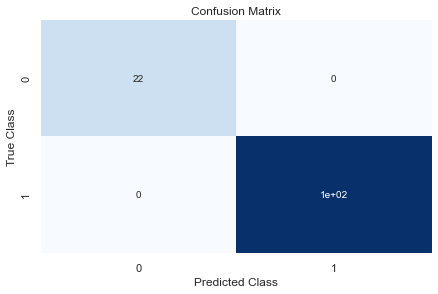

[[ 22   0]
 [  0 104]]


In [389]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(y_test, y_test_pred)

# crear marco de datos de pandas Crear un conjunto de datos
dataframe = pd.DataFrame(cm)

# crear matriz de confusión
sns.heatmap(dataframe, annot=True, cbar=None, cmap="Blues")
plt.title("Confusion Matrix"), plt.tight_layout()
plt.ylabel("True Class"), plt.xlabel("Predicted Class")
plt.show()

print(cm)

### XGBoost múltiples árboles

In [546]:
#!pip install xgboost
import xgboost as xgb

In [547]:
# Convertiremos las variables en dummys y nos quedaremos para nuestro modelo con la columna Titular.

variables_xgb= df_final_dummy
variables_xgb

,Titular,Experiencia_temporadas,Puntos,Asistencias,Rebotes,Posición_Center,Posición_Point Guard,Posición_Power Forward,Posición_Shooting Guard,Posición_Small Forward,Cluster_1,Cluster_2,Cluster_3
0,1,3,9.6,2.3,3.3,0,1,0,0,0,0,0,1
1,1,2,3.9,1.6,1.0,0,1,0,0,0,1,0,0
2,1,1,1.5,0.4,3.0,0,0,1,0,0,1,0,0
3,1,1,11.2,1.3,4.0,0,0,0,1,0,0,1,0
4,1,6,14.3,0.9,14.2,1,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,1,5,7.7,2.2,2.2,0,1,0,0,0,0,1,0
414,1,12,8.2,0.9,4.1,1,0,0,0,0,0,1,0
415,1,1,13.4,1.5,5.8,0,0,1,0,0,0,1,0
416,1,12,21.7,10.3,9.5,0,1,0,0,0,0,0,1


In [548]:
# Empezamos a armar nuestro modelo separando X e y
X= variables_xgb.drop(["Titular"], axis=1)
X

,Experiencia_temporadas,Puntos,Asistencias,Rebotes,Posición_Center,Posición_Point Guard,Posición_Power Forward,Posición_Shooting Guard,Posición_Small Forward,Cluster_1,Cluster_2,Cluster_3
0,3,9.6,2.3,3.3,0,1,0,0,0,0,0,1
1,2,3.9,1.6,1.0,0,1,0,0,0,1,0,0
2,1,1.5,0.4,3.0,0,0,1,0,0,1,0,0
3,1,11.2,1.3,4.0,0,0,0,1,0,0,1,0
4,6,14.3,0.9,14.2,1,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
413,5,7.7,2.2,2.2,0,1,0,0,0,0,1,0
414,12,8.2,0.9,4.1,1,0,0,0,0,0,1,0
415,1,13.4,1.5,5.8,0,0,1,0,0,0,1,0
416,12,21.7,10.3,9.5,0,1,0,0,0,0,0,1


In [549]:
# Nos quedamos con y
y=variables_xgb[['Titular']]
y

,Titular
0,1
1,1
2,1
3,1
4,1
...,...
413,1
414,1
415,1
416,1


In [550]:
# Calculamos la distribución de titulares y suplentes del dataset

print(df_final_y.value_counts())

Titular
0          338
1          338
dtype: int64


In [551]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state=42)

In [552]:
#entrenamos un modelo de ensamble (múltiples árboles).


xgb = xgb.XGBClassifier(n_estimators=100, learning_rate=0.01, gamma=0, subsample=0.98,colsample_bytree=1, max_depth=5)
xgb.fit(X_train,y_train.squeeze().values)

# calculamos y imprimos los scores del modelo para el top 10 de features
y_train_preds = xgb.predict(X_train)
y_test_preds = xgb.predict(X_test)

# la métrica a utilizar para evaluar el modelo es el accuracy
print('XGB accuracy score for train: %.3f: test: %.3f' % (accuracy_score(y_train, y_train_preds),accuracy_score(y_test, y_test_preds)))


[23:22:28] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
XGB accuracy score for train: 0.901: test: 0.865


In [553]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_test_preds))

              precision    recall  f1-score   support

           0       0.63      0.55      0.59        22
           1       0.91      0.93      0.92       104

    accuracy                           0.87       126
   macro avg       0.77      0.74      0.75       126
weighted avg       0.86      0.87      0.86       126



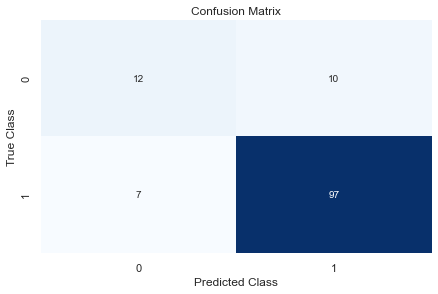

[[12 10]
 [ 7 97]]


In [554]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(y_test, y_test_preds)

# crear marco de datos de pandas Crear un conjunto de datos
dataframe = pd.DataFrame(cm)

sns.heatmap(dataframe, annot=True, cbar=None, cmap="Blues")
plt.title("Confusion Matrix"), plt.tight_layout()
plt.ylabel("True Class"), plt.xlabel("Predicted Class")
plt.show()

print(cm)

In [853]:
# Variables con mayor peso en el modelo.

headers = ["name", "score"]
values = sorted(zip(X_train.columns, xgb.feature_importances_), key=lambda x: x[1] * -1)
xgb_feature_importances = pd.DataFrame(values, columns = headers)
xgb_feature_importances.head(10)

,name,score
0,Cluster_1,0.501244
1,Posición_Shooting Guard,0.089234
2,Posición_Point Guard,0.069192
3,Posición_Power Forward,0.068746
4,Rebotes,0.064592
5,Experiencia_temporadas,0.062153
6,Puntos,0.052869
7,Asistencias,0.039182
8,Posición_Center,0.036101
9,Cluster_2,0.009104


(10, 2)


[Text(0, 0, 'Cluster_1'),
 Text(1, 0, 'Posición_Shooting Guard'),
 Text(2, 0, 'Posición_Point Guard'),
 Text(3, 0, 'Posición_Power Forward'),
 Text(4, 0, 'Rebotes'),
 Text(5, 0, 'Experiencia_temporadas'),
 Text(6, 0, 'Puntos'),
 Text(7, 0, 'Asistencias'),
 Text(8, 0, 'Posición_Center'),
 Text(9, 0, 'Cluster_2')]

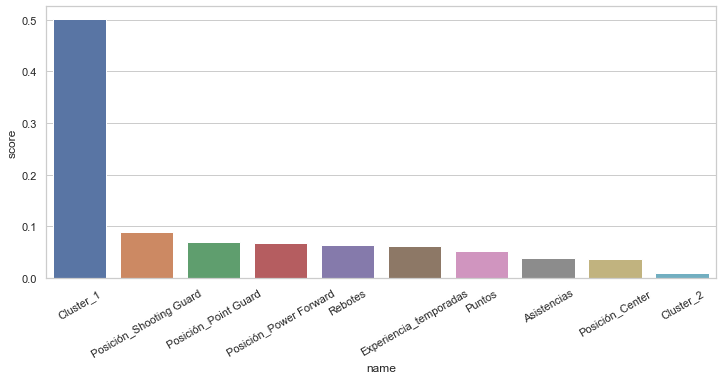

In [561]:
final_importance= xgb_feature_importances.head(10)
print(final_importance.shape)
plt.figure(figsize=(12,5))
ax=sns.barplot(x=final_importance.name, y= final_importance.score)
ax.set_xticklabels(ax.get_xticklabels(),rotation = 30)


Como podemos ver en el gráfico, las características más importantes para determinar si el jugador es titular o suplente son:

1. Cluster_1
2. Posición_Shooting Guard
3. Posición_Point Guard
4. Posición_Power Forward
5. Rebotes
6. Experiencia_temporadas
7. Puntos
8. Asistencias
9. Posición_Center
10. Cluster_2


Podemos obvservar que la variable que agrupa o no a los jugadores que se encuentran en el cluster 1 (jugadores baratos/rookies) es la que mayor peso tiene al momento de clasificar si el jugador es titular o suplente. Esto se explica porque si el jugador pertenece al cluster 1, tendrá mayor probabilidad de ser suplente por las características del grupo que describimos anteriormente (pocos puntos y bajo valor de mercado).  

Por otro lado, si el player tiene o no una posición de escolta (shooting guard) también será determinante. Intepretamos que esta condición está asociada a que muchos describen al escolta como alguien cuya función principal es la de sumar puntos cantidad de puntos que cantidad de puntos en el partido. Por otro lado, vemos que la quinta variable de peso son los rebotes, asociados a la conversión de puntos. Le siguen las temporadas y el promedio de puntos (como vimos en el gráfico de cluster, muchos jugadores suplentes tienen similares promedios de puntos que jugadores estrellas titulares).

Como conclusión, interpretamos que para predecir si un jugador tendrá futuro de titular, debemos concentrarnos en rendimiento medido en puntos, rebotes y si tiene un rol de anotador dentro del equipo.